# NEURAL NETWORK ( FOREST FIRES)

## Dataset: forestfires.csv


In [1]:
# Importig Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Loading dataset

data = pd.read_csv('C:/Users/Hi/Downloads/forestfires.csv')

## EDA & Data preprocessing

In [3]:
data.shape

(517, 31)

In [4]:
data.shape

(517, 31)

In [5]:
data.sample(10)

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
243   aug  sun  91.8  175.1  700.7  13.8  21.9  73   7.6   1.0  ...         0   
333   sep  mon  92.1   87.7  721.1   9.5  18.1  54   3.1   0.0  ...         0   
325   sep  sat  92.2  102.3  751.5   8.4  24.2  27   3.1   0.0  ...         0   
329   sep  sat  92.2  102.3  751.5   8.4  23.5  27   4.0   0.0  ...         0   
503   aug  wed  94.5  139.4  689.1  20.0  29.2  30   4.9   0.0  ...         0   
129   oct  sun  92.6   46.5  691.8   8.8  15.4  35   0.9   0.0  ...         0   
479   jul  mon  89.2  103.9  431.6   6.4  22.6  57   4.9   0.0  ...         0   
331   sep  sat  91.2  124.4  795.3   8.5  21.5  28   4.5   0.0  ...         0   
290   jul  sat  91.6  104.2  474.9   9.0  18.7  53   1.8   0.0  ...         0   
278   dec  mon  85.4   25.4  349.7   2.6   4.6  21   8.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
243         0         0         0         0         0         0         0   
333         0         0         0         0         0         0         0   
325         0         0         0         0         0         0         0   
329         0         0         0         0         0         0         0   
503         0         0         0         0         0         0         0   
129         0         0         0         0         0         0         1   
479         0         1         0         0         0         0         0   
331         0         0         0         0         0         0         0   
290         0         1         0         0         0         0         0   
278         0         0         0         0         0         0         0   

     monthsep  size_category  
243         0          small  
333         1          small  
325         1          small  
329         1          small  
503         0          small  
129         0          small  
479         0          large  
331         1          large  
290         0          small  
278         0          large  

[10 rows x 31 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [7]:
data.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [8]:
data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
# Dropping columns which are not required

data = data.drop(['dayfri', 'daymon', 'daysat', 'daysun', 'daythu','daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 
                  'monthfeb','monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov','monthoct','monthsep'], 
                 axis = 1)
data

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00   

    size_category  
0           small  
1           small  
2           small  
3           small  
4           small  
..            ...  
512         large  
513         large  
514         large  
515         small  
516         small  

[517 rows x 12 columns]

In [10]:
# Checking how much datapoints are having small and large area
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

<AxesSubplot:xlabel='size_category', ylabel='count'>

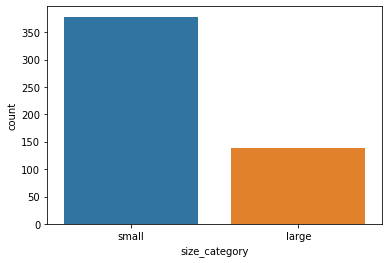

In [11]:
import seaborn as sns
sns.countplot(x = 'size_category', data = data)

In [12]:
# Checking for which value of area is categorised into large and small by creating crosstab between area and size_category
pd.crosstab(data.area, data.size_category)

size_category  large  small
area                       
0.00               0    247
0.09               0      1
0.17               0      1
0.21               0      1
0.24               0      1
...              ...    ...
200.94             1      0
212.88             1      0
278.53             1      0
746.28             1      0
1090.84            1      0

[251 rows x 2 columns]

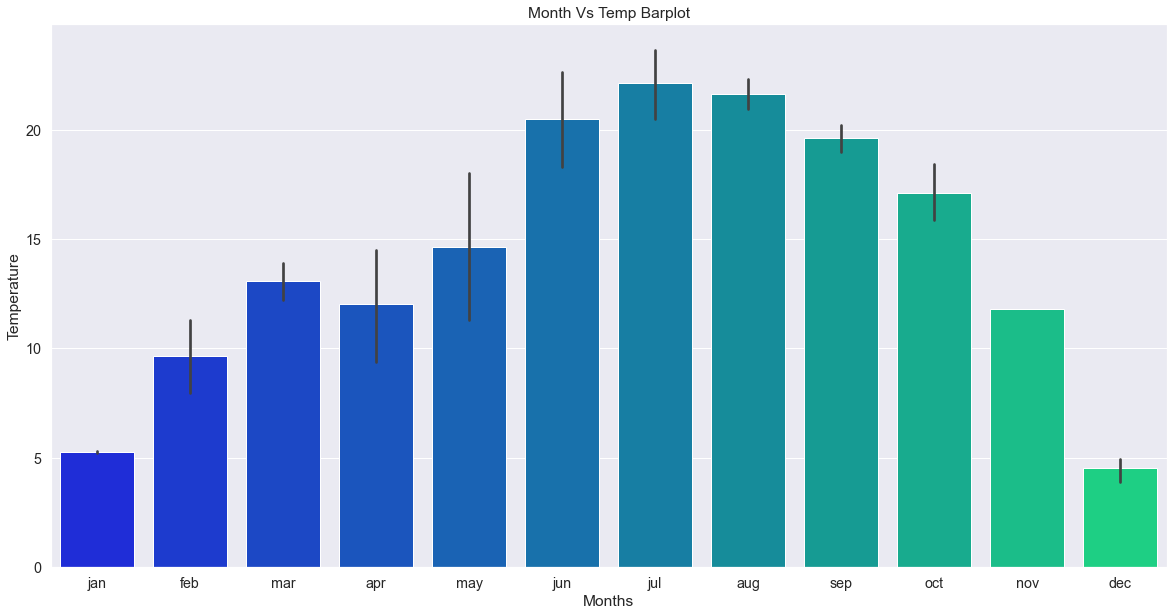

In [13]:
# Plotting Month Vs. temp plot
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [20, 10]
sns.set(style = "darkgrid", font_scale = 1.3)
month_temp = sns.barplot(x = 'month', y = 'temp', data = data,
                         order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette = 'winter');
month_temp.set(title = "Month Vs Temp Barplot", xlabel = "Months", ylabel = "Temperature");

C:\Users\Hi\anaconda3ab\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


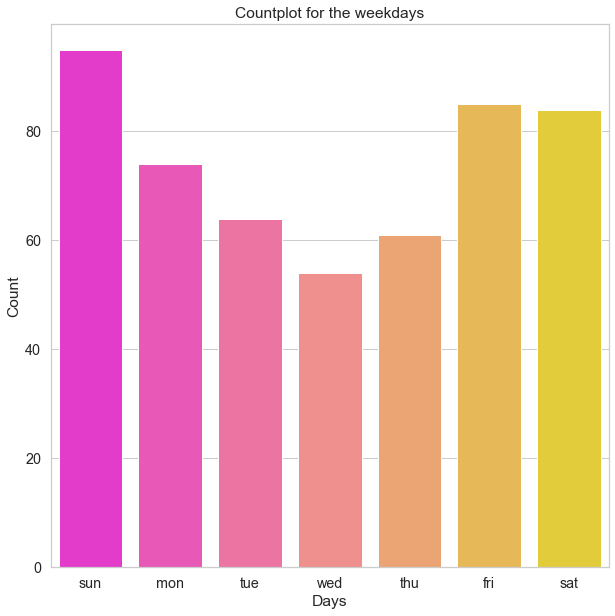

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.set(style = 'whitegrid', font_scale = 1.3)
day = sns.countplot(data['day'], order = ['sun' ,'mon', 'tue', 'wed', 'thu', 'fri', 'sat'], palette = 'spring')
day.set(title = 'Countplot for the weekdays', xlabel = 'Days', ylabel = 'Count');

Text(0.5, 1.0, 'HeatMap of Features for the Classes')

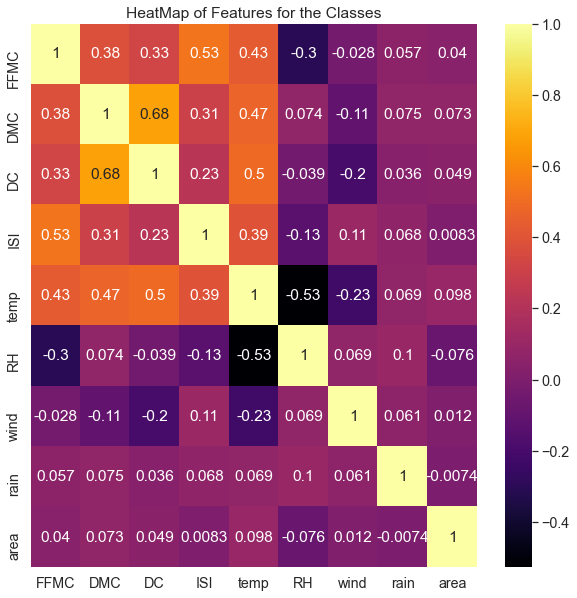

In [15]:
sns.heatmap(data.corr(), annot=True, cmap="inferno")
ax = plt.gca()
ax.set_title("HeatMap of Features for the Classes")

In [16]:
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area size_category
0   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0         small
1   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0         small
2   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0         small
3   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0         small
4   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0         small

In [17]:
# Encoding month and day features

data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                           (1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
data.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
data.head()

month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area  \
0      3    5  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0   
1     10    2  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0   
2     10    6  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0   
3      3    5  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0   
4      3    7  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0   

  size_category  
0         small  
1         small  
2         small  
3         small  
4         small

In [18]:
# Encoding target variable 'size category'

data.size_category.replace(('small', 'large'), (0, 1), inplace = True)
data.sample(5)

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  \
308      9    7  92.4  105.8  758.1   9.9  16.0  45   1.8   0.0   0.00   
203     10    3  91.4   37.9  673.8   5.2  20.2  37   2.7   0.0  13.70   
195      8    5  93.9  135.7  586.7  15.1  23.5  36   5.4   0.0  10.02   
515      8    6  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00   
113      9    1  91.8   78.5  724.3   9.2  18.9  35   2.7   0.0   0.00   

     size_category  
308              0  
203              1  
195              1  
515              0  
113              0

In [19]:
data.corr()['size_category'].sort_values(ascending=False)

size_category    1.000000
area             0.311322
month            0.080316
wind             0.059113
rain             0.050001
DMC              0.034715
FFMC             0.022063
DC               0.019428
day              0.016796
temp             0.006021
ISI             -0.008726
RH              -0.045243
Name: size_category, dtype: float64

In [20]:
# Standardizing data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
scaler.fit(data.drop('size_category',axis=1))

StandardScaler()

In [22]:
scaled_features=scaler.transform(data.drop('size_category',axis=1))
data_head=pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_head

month       day      FFMC       DMC        DC       ISI      temp  \
0   -1.968443  0.357721 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1    1.110120 -1.090909 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2    1.110120  0.840597 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3   -1.968443  0.357721  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4   -1.968443  1.323474 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   
..        ...       ...       ...       ...       ...       ...       ...   
512  0.230531  1.323474 -1.640083 -0.846648  0.474768 -1.563460  1.536084   
513  0.230531  1.323474 -1.640083 -0.846648  0.474768 -1.563460  0.519019   
514  0.230531  1.323474 -1.640083 -0.846648  0.474768 -1.563460  0.398350   
515  0.230531  0.840597  0.680957  0.549003  0.269382  0.500176  1.156839   
516  1.549915 -1.090909 -2.020879 -1.685913 -1.780442 -1.739089 -1.222058   

           RH      wind      rain      area  
0    0.411724  1.498614 -0.073268 -0.202020  
1   -0.692456 -1.741756 -0.073268 -0.202020  
2   -0.692456 -1.518282 -0.073268 -0.202020  
3    3.233519 -0.009834  0.603155 -0.202020  
4    3.356206 -1.238940 -0.073268 -0.202020  
..        ...       ...       ...       ...  
512 -0.753800 -0.736124 -0.073268 -0.100753  
513  1.638592  0.995798 -0.073268  0.651674  
514  1.577248  1.498614 -0.073268 -0.026532  
515 -0.140366 -0.009834 -0.073268 -0.202020  
516 -0.815143  0.269509 -0.073268 -0.202020  

[517 rows x 11 columns]

In [23]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_head,data['size_category'], test_size=0.3, random_state=42)

In [24]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of x_train:  (361, 11)
Shape of x_test:  (156, 11)
Shape of y_train:  (361,)
Shape of y_test:  (156,)


## Artificial Neural Network Model - Backpropagation

In [25]:
from keras.models import Sequential
from keras.layers import Dense

In [26]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [27]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
# Fit the model
model.fit(x_train,y_train, epochs=100, batch_size=10)

Epoch 1/100
37/37 [==============================] - 1s 2ms/step - loss: 0.6892 - accuracy: 0.7341
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.7285
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.7285
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6021 - accuracy: 0.7285
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7285
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5394 - accuracy: 0.7285
Epoch 7/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5297 - accuracy: 0.7285
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5218 - accuracy: 0.7285
Epoch 9/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7285
Epoch 10/100
37/37 [==============================] - 0s 2ms/step - loss: 0.5021 - accuracy: 0.7285
Epoch 11/

37/37 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9945
Epoch 84/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9889
Epoch 85/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9945
Epoch 86/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.9917
Epoch 87/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9945
Epoch 88/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9861
Epoch 89/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0258 - accuracy: 0.9917
Epoch 90/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0227 - accuracy: 0.9945
Epoch 91/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9945
Epoch 92/100
37/37 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9945
Epoch 93/100


In [29]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0451 - accuracy: 0.9744
accuracy: 97.44%


## Artificial Neural Network Model - Tuning of Hyperparameters batch size and epochs 

In [30]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [31]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=adam_v2.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [33]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train, y_train)

<ipython-input-33-ac085d7879ca>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.1s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.0s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.1s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.1s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.0s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

In [34]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9750760912895202, using {'batch_size': 40, 'epochs': 50}
0.9419710874557495,0.03400748669478207 with: {'batch_size': 10, 'epochs': 10}
0.9639649748802185,0.014209469712639212 with: {'batch_size': 10, 'epochs': 50}
0.9639649748802185,0.016705376288116656 with: {'batch_size': 10, 'epochs': 100}
0.9085996985435486,0.025708051589681664 with: {'batch_size': 20, 'epochs': 10}
0.9694824814796448,0.02044361130464319 with: {'batch_size': 20, 'epochs': 50}
0.958371388912201,0.024887807933164568 with: {'batch_size': 20, 'epochs': 100}
0.7563165903091431,0.06512836627679945 with: {'batch_size': 40, 'epochs': 10}
0.9750760912895202,0.01618475517837983 with: {'batch_size': 40, 'epochs': 50}
0.9695205330848694,0.013624658689352784 with: {'batch_size': 40, 'epochs': 100}


## Artificial Neural Network Model - Tuning of All Hyperparameters 

In [ ]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

<ipython-input-35-ead22b96c799>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn = create_model,verbose = 0)


Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.6s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=4

[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.8s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.6s
[CV 3/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.7s
[CV 4/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 6/8748] END activation_fu

[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.3s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.8s
[CV 4/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.8s
[CV 5/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 11/8748] END activation_f

[CV 3/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.8s
[CV 4/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 5/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.7s
[CV 1/5; 17/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 17/8748] END activa

[CV 4/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.5s
[CV 5/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.8s
[CV 1/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 22/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.8s
[CV 2/5; 22/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 22/8748] END activation_functio

[CV 5/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.7s
[CV 1/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.8s
[CV 2/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 27/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 3/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 27/8748] END activation_f

[CV 1/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.8s
[CV 2/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.8s
[CV 3/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.8s
[CV 4/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 32/8748] END activation_f

[CV 2/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.7s
[CV 3/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.6s
[CV 4/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.6s
[CV 5/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 37/8748] END activation_functio

[CV 3/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.7s
[CV 4/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 5/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.8s
[CV 1/5; 43/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 43/8748] END activation_functi

[CV 4/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.8s
[CV 5/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.8s
[CV 1/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 48/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 2/5; 48/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 48/8748] END activation_function=soft

[CV 5/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 1/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.8s
[CV 2/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 53/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.7s
[CV 3/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 53/8748] END activation_functio

[CV 1/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.6s
[CV 2/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.6s
[CV 3/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.6s
[CV 4/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 58/8748] END activation_function=soft

[CV 2/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.6s
[CV 3/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.6s
[CV 4/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.6s
[CV 5/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 63/8748] END activation_functio

[CV 3/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.6s
[CV 4/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.6s
[CV 5/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.6s
[CV 1/5; 69/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 69/8748] END activation_function=softmax, b

[CV 4/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 5/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.8s
[CV 1/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 74/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.4s
[CV 2/5; 74/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 74/8748] END activation_function=softmax, batch_s

[CV 1/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.6s
[CV 2/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.9s
[CV 3/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.7s
[CV 4/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 79/8748] END activation_function=softmax, b

[CV 2/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   4.0s
[CV 3/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.8s
[CV 4/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.9s
[CV 5/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 84/8748] END activa

[CV 3/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.1s
[CV 4/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.8s
[CV 5/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   4.0s
[CV 1/5; 90/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 90/8748] END 

[CV 4/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.0s
[CV 5/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.1s
[CV 1/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 95/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.7s
[CV 2/5; 95/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 95/8748] END activation_f

[CV 5/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   6.3s
[CV 1/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.0s
[CV 2/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 100/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.8s
[CV 3/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 100/8748] END activation

[CV 1/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 2/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 3/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.6s
[CV 4/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 105/8748] END activation_

[CV 2/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.6s
[CV 3/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 4/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.7s
[CV 5/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 110/8748] END activ

[CV 3/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 4/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   4.3s
[CV 5/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   4.3s
[CV 1/5; 116/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 116/8748] END

[CV 4/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.5s
[CV 5/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.3s
[CV 1/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 121/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.9s
[CV 2/5; 121/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 121/8748] END activation_

[CV 5/5; 125/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.9s
[CV 1/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.0s
[CV 2/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 126/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.2s
[CV 3/5; 126/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 126/8748] END activ

[CV 1/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   4.2s
[CV 2/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.9s
[CV 3/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 131/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.8s
[CV 4/5; 131/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 131/8748] END activation_functi

[CV 2/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.9s
[CV 3/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.8s
[CV 4/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 136/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.9s
[CV 5/5; 136/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 136/8748] END activation_functi

[CV 3/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.9s
[CV 4/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.0s
[CV 5/5; 141/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 141/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.3s
[CV 1/5; 142/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 142/8748] END activation_funct

[CV 4/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.9s
[CV 5/5; 146/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 146/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.9s
[CV 1/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 147/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.9s
[CV 2/5; 147/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 147/8748] END activation_function=sof

[CV 5/5; 151/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.8s
[CV 1/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.8s
[CV 2/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 152/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.0s
[CV 3/5; 152/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 152/8748] END activation_functi

[CV 1/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.0s
[CV 2/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.2s
[CV 3/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 157/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.1s
[CV 4/5; 157/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 157/8748] END activation_function=softmax, 

[CV 2/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.7s
[CV 3/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.2s
[CV 4/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 162/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.0s
[CV 5/5; 162/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 162/8748] END activation_function=sof

[CV 3/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   5.2s
[CV 4/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   5.3s
[CV 5/5; 167/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 167/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   5.9s
[CV 1/5; 168/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 168/874

[CV 3/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.7s
[CV 4/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   5.0s
[CV 5/5; 172/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 172/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   5.7s
[CV 1/5; 173/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 173/8748] END

[CV 4/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.5s
[CV 5/5; 177/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 177/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.5s
[CV 1/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 178/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   4.6s
[CV 2/5; 178/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 178/8748] 

[CV 5/5; 182/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   5.3s
[CV 1/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   4.9s
[CV 2/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 183/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   4.9s
[CV 3/5; 183/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 183/8748] END activ

[CV 1/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   5.5s
[CV 2/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   5.5s
[CV 3/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 188/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   5.1s
[CV 4/5; 188/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 188/8748] END

[CV 2/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   6.7s
[CV 3/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   6.6s
[CV 4/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 193/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   6.5s
[CV 5/5; 193/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 193/8748] END

[CV 3/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   7.2s
[CV 4/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   6.8s
[CV 5/5; 198/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 198/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   6.4s
[CV 1/5; 199/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 199/8748]

[CV 4/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   6.2s
[CV 5/5; 203/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 203/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   6.7s
[CV 1/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 204/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   6.7s
[CV 2/5; 204/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 204/8748] END activ

[CV 5/5; 208/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   6.5s
[CV 1/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   6.5s
[CV 2/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 209/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   6.2s
[CV 3/5; 209/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 209/8748] END activation_

[CV 1/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   7.0s
[CV 2/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   6.6s
[CV 3/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 214/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   7.2s
[CV 4/5; 214/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 214/8748] END activ

[CV 2/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   8.1s
[CV 3/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   6.5s
[CV 4/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 219/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   6.7s
[CV 5/5; 219/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 219/8748] END activation_

[CV 3/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   7.5s
[CV 4/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   7.6s
[CV 5/5; 224/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 224/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   7.7s
[CV 1/5; 225/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 225/8748] END activ

[CV 4/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   7.3s
[CV 5/5; 229/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 229/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   7.4s
[CV 1/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 230/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   7.4s
[CV 2/5; 230/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 230/8748] END activation_functi

[CV 5/5; 234/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   6.3s
[CV 1/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   7.1s
[CV 2/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 235/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   6.8s
[CV 3/5; 235/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 235/8748] END activation_function=s

[CV 1/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   6.2s
[CV 2/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   7.0s
[CV 3/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 240/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   6.4s
[CV 4/5; 240/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 240/8748] END activation_function=sof

[CV 2/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.7s
[CV 3/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.7s
[CV 4/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 245/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.7s
[CV 5/5; 245/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 245/8748] END

[CV 3/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.7s
[CV 4/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.7s
[CV 5/5; 250/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 250/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.7s
[CV 1/5; 251/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 251/874

[CV 4/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.1s
[CV 5/5; 255/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 255/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.5s
[CV 1/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 256/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.1s
[CV 2/5; 256/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 256/8748] END activ

[CV 5/5; 260/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.1s
[CV 1/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.1s
[CV 2/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 261/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.1s
[CV 3/5; 261/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 261/8748] END

[CV 1/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.1s
[CV 2/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.2s
[CV 3/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 266/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.1s
[CV 4/5; 266/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 266/8748] END activation_

[CV 2/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.1s
[CV 3/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.5s
[CV 4/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 271/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.1s
[CV 5/5; 271/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 271/8748] END activ

[CV 3/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.4s
[CV 4/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.3s
[CV 5/5; 276/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 276/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.6s
[CV 1/5; 277/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 277/8748] END acti

[CV 4/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.4s
[CV 5/5; 281/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 281/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.1s
[CV 1/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 282/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.1s
[CV 2/5; 282/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 282/8748] END activation_

[CV 5/5; 286/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 1/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.7s
[CV 2/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 287/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.7s
[CV 3/5; 287/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 287/8748] END activ

[CV 1/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.1s
[CV 2/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.1s
[CV 3/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 292/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.1s
[CV 4/5; 292/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 292/8748] END activation_functi

[CV 2/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.1s
[CV 3/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.2s
[CV 4/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 297/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.2s
[CV 5/5; 297/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 297/8748] END activation_

[CV 3/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 4/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.2s
[CV 5/5; 302/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 302/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.2s
[CV 1/5; 303/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 303/8748] END activation_functi

[CV 4/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.1s
[CV 5/5; 307/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 307/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.1s
[CV 1/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 308/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.1s
[CV 2/5; 308/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 308/8748] END activation_function=sof

[CV 5/5; 312/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.1s
[CV 1/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.1s
[CV 2/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 313/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.1s
[CV 3/5; 313/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 313/8748] END activation_functio

[CV 1/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.1s
[CV 2/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.1s
[CV 3/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 318/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.1s
[CV 4/5; 318/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 318/8748] END activation_function=softmax, 

[CV 2/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.1s
[CV 3/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.1s
[CV 4/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 323/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.2s
[CV 5/5; 323/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 323/8748] END activation_function=sof

[CV 3/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.7s
[CV 4/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.7s
[CV 5/5; 328/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 328/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.8s
[CV 1/5; 329/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 329/8748] END

[CV 4/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.8s
[CV 5/5; 333/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 333/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.7s
[CV 1/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 334/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.7s
[CV 2/5; 334/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 334/8748] END

[CV 5/5; 338/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.8s
[CV 1/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.7s
[CV 2/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 339/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.7s
[CV 3/5; 339/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 339/8748] END activ

[CV 1/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.7s
[CV 2/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.7s
[CV 3/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 344/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.7s
[CV 4/5; 344/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 344/8748] END activation_

[CV 2/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.8s
[CV 3/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.8s
[CV 4/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 349/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.8s
[CV 5/5; 349/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 349/8748] END activ

[CV 3/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.8s
[CV 4/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.8s
[CV 5/5; 354/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 354/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.9s
[CV 1/5; 355/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 355/8748] END activ

[CV 4/5; 359/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 5/5; 359/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 359/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.8s
[CV 1/5; 360/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 360/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.8s
[CV 2/5; 360/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 360/8748] END

[CV 5/5; 364/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.9s
[CV 1/5; 365/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 365/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.9s
[CV 2/5; 365/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 365/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.8s
[CV 3/5; 365/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 365/8748] END activation_

[CV 1/5; 370/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   4.3s
[CV 2/5; 370/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 370/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.8s
[CV 3/5; 370/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 370/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.9s
[CV 4/5; 370/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 370/8748] END activation_functi

[CV 2/5; 375/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 3/5; 375/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 375/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 4/5; 375/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 375/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.9s
[CV 5/5; 375/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 375/8748] END activation_functi

[CV 3/5; 380/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.9s
[CV 4/5; 380/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 380/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.9s
[CV 5/5; 380/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 380/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.8s
[CV 1/5; 381/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 381/8748] END activation_functi

[CV 4/5; 385/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.8s
[CV 5/5; 385/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 385/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.9s
[CV 1/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 386/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.9s
[CV 2/5; 386/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 386/8748] END activation_

[CV 5/5; 390/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.9s
[CV 1/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 391/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   4.2s
[CV 2/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 391/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.9s
[CV 3/5; 391/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 391/8748] END activation_function=sof

[CV 1/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 2/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 3/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 396/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 4/5; 396/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 396/8748] END activation_functi

[CV 2/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   4.0s
[CV 3/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.9s
[CV 4/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 401/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.8s
[CV 5/5; 401/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 401/8748] END activation_function=softmax, 

[CV 3/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   6.5s
[CV 4/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   6.4s
[CV 5/5; 406/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 406/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   6.5s
[CV 1/5; 407/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 407/874

[CV 3/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   6.6s
[CV 4/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   6.7s
[CV 5/5; 411/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 411/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   6.7s
[CV 1/5; 412/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 412/87

[CV 3/5; 416/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   6.5s
[CV 4/5; 416/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 416/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   7.0s
[CV 5/5; 416/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 416/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   6.5s
[CV 1/5; 417/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 417/8748] END

[CV 4/5; 421/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   6.6s
[CV 5/5; 421/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 421/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   6.3s
[CV 1/5; 422/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 422/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time= 6.8min
[CV 2/5; 422/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 422/874

[CV 5/5; 426/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   6.6s
[CV 1/5; 427/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 427/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   6.5s
[CV 2/5; 427/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 427/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   6.6s
[CV 3/5; 427/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 427/8748] END activ

[CV 1/5; 432/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   4.8s
[CV 2/5; 432/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 432/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   4.7s
[CV 3/5; 432/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 432/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   4.8s
[CV 4/5; 432/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 432/8748] END

[CV 2/5; 437/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.7s
[CV 3/5; 437/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 437/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.8s
[CV 4/5; 437/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 437/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.7s
[CV 5/5; 437/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 437/8748] END

[CV 3/5; 442/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.7s
[CV 4/5; 442/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 442/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   5.1s
[CV 5/5; 442/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 442/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.7s
[CV 1/5; 443/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 443/8748] END activ

[CV 4/5; 447/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.7s
[CV 5/5; 447/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 447/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.8s
[CV 1/5; 448/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 448/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   4.8s
[CV 2/5; 448/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 448/8748] END ac

[CV 5/5; 452/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   4.7s
[CV 1/5; 453/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 453/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   4.8s
[CV 2/5; 453/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 453/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   4.7s
[CV 3/5; 453/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 453/8748] END activation_

[CV 1/5; 458/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.7s
[CV 2/5; 458/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 458/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.8s
[CV 3/5; 458/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 458/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.7s
[CV 4/5; 458/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 458/8748] END activ

[CV 2/5; 463/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   5.8s
[CV 3/5; 463/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 463/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   5.7s
[CV 4/5; 463/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 463/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   5.8s
[CV 5/5; 463/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 463/8748] END activation_

[CV 3/5; 468/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   5.2s
[CV 4/5; 468/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 468/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   5.2s
[CV 5/5; 468/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 468/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   4.8s
[CV 1/5; 469/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 469/8748] END activat

[CV 4/5; 473/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   4.8s
[CV 5/5; 473/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 473/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   8.2s
[CV 1/5; 474/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 474/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   6.6s
[CV 2/5; 474/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 474/8748] END activation_functi

[CV 5/5; 478/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   7.3s
[CV 1/5; 479/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 479/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   8.6s
[CV 2/5; 479/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 479/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   8.7s
[CV 3/5; 479/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 479/8748] END activation_function=sof

[CV 1/5; 484/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   6.6s
[CV 2/5; 484/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 484/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   6.7s
[CV 3/5; 484/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 484/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   6.7s
[CV 4/5; 484/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 484/8748] END activation_functi

[CV 2/5; 489/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.6s
[CV 3/5; 489/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 489/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.7s
[CV 4/5; 489/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 489/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.7s
[CV 5/5; 489/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 489/8748] END

[CV 3/5; 494/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.6s
[CV 4/5; 494/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 494/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.6s
[CV 5/5; 494/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 494/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.7s
[CV 1/5; 495/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 495/874

[CV 4/5; 499/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.7s
[CV 5/5; 499/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 499/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.6s
[CV 1/5; 500/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 500/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 500/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 500/8748] END activ

[CV 5/5; 504/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.8s
[CV 1/5; 505/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 505/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.3s
[CV 2/5; 505/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 505/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.7s
[CV 3/5; 505/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 505/8748] END activatio

[CV 1/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.2s
[CV 2/5; 510/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.7s
[CV 3/5; 510/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 510/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.8s
[CV 4/5; 510/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 510/8748] END activation_

[CV 2/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.7s
[CV 3/5; 515/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.7s
[CV 4/5; 515/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 515/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.6s
[CV 5/5; 515/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 515/8748] END activ

[CV 3/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 4/5; 520/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.8s
[CV 5/5; 520/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 520/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.7s
[CV 1/5; 521/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 521/8748] END

[CV 4/5; 525/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.7s
[CV 5/5; 525/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 525/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.7s
[CV 1/5; 526/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 526/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.8s
[CV 2/5; 526/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 526/8748] END activation_

[CV 5/5; 530/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.8s
[CV 1/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 531/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.6s
[CV 2/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 531/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.7s
[CV 3/5; 531/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 531/8748] END activ

[CV 1/5; 536/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.6s
[CV 2/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 536/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.6s
[CV 3/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 536/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.7s
[CV 4/5; 536/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 536/8748] END activation_functi

[CV 2/5; 541/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.8s
[CV 3/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 541/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.7s
[CV 4/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 541/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.7s
[CV 5/5; 541/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 541/8748] END activation_functi

[CV 3/5; 546/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.7s
[CV 4/5; 546/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 546/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.7s
[CV 5/5; 546/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 546/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.7s
[CV 1/5; 547/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 547/8748] END activation_funct

[CV 4/5; 551/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.7s
[CV 5/5; 551/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 551/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.7s
[CV 1/5; 552/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 552/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.7s
[CV 2/5; 552/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 552/8748] END activation_function=sof

[CV 5/5; 556/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.8s
[CV 1/5; 557/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 557/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.8s
[CV 2/5; 557/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 557/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.8s
[CV 3/5; 557/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 557/8748] END activation_functi

[CV 1/5; 562/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.7s
[CV 2/5; 562/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 562/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.7s
[CV 3/5; 562/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 562/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.3s
[CV 4/5; 562/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 562/8748] END activation_function=softmax, 

[CV 2/5; 567/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.7s
[CV 3/5; 567/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 567/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.3s
[CV 4/5; 567/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 567/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.8s
[CV 5/5; 567/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 567/8748] END activation_function=sof

[CV 3/5; 572/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.9s
[CV 4/5; 572/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 572/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.9s
[CV 5/5; 572/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 572/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.9s
[CV 1/5; 573/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 573/8748] END

[CV 4/5; 577/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.8s
[CV 5/5; 577/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 577/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.8s
[CV 1/5; 578/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 578/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.8s
[CV 2/5; 578/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 578/8748] END activ

[CV 5/5; 582/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.8s
[CV 1/5; 583/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 583/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.8s
[CV 2/5; 583/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 583/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.8s
[CV 3/5; 583/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 583/8748] END 

[CV 1/5; 588/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.8s
[CV 2/5; 588/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 588/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.8s
[CV 3/5; 588/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 588/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.8s
[CV 4/5; 588/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 588/8748] END activation_

[CV 2/5; 593/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.5s
[CV 3/5; 593/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 593/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.3s
[CV 4/5; 593/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 593/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.4s
[CV 5/5; 593/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 593/8748] END activ

[CV 3/5; 598/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.4s
[CV 4/5; 598/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 598/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.3s
[CV 5/5; 598/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 598/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.5s
[CV 1/5; 599/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 599/8748] END activ

[CV 4/5; 603/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.5s
[CV 5/5; 603/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 603/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.4s
[CV 1/5; 604/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 604/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.3s
[CV 2/5; 604/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 604/8748] END activ

[CV 5/5; 608/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.0s
[CV 1/5; 609/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 609/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   3.7s
[CV 2/5; 609/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 609/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.3s
[CV 3/5; 609/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 609/8748] END activation_

[CV 1/5; 614/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.1s
[CV 2/5; 614/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 614/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.1s
[CV 3/5; 614/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 614/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   3.0s
[CV 4/5; 614/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 614/8748] END activation_functi

[CV 2/5; 619/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.0s
[CV 3/5; 619/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 619/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.0s
[CV 4/5; 619/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 619/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   3.0s
[CV 5/5; 619/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 619/8748] END activation_

[CV 3/5; 624/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.0s
[CV 4/5; 624/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 624/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.0s
[CV 5/5; 624/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 624/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.0s
[CV 1/5; 625/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 625/8748] END activation_functi

[CV 4/5; 629/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.8s
[CV 5/5; 629/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 629/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.9s
[CV 1/5; 630/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 630/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.9s
[CV 2/5; 630/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 630/8748] END activation_

[CV 5/5; 634/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.8s
[CV 1/5; 635/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 635/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.9s
[CV 2/5; 635/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 635/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.8s
[CV 3/5; 635/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 635/8748] END activation_function=sof

[CV 1/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.8s
[CV 2/5; 640/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.8s
[CV 3/5; 640/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 640/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.8s
[CV 4/5; 640/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 640/8748] END activation_function=softmax, 

[CV 2/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.8s
[CV 3/5; 645/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.8s
[CV 4/5; 645/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 645/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.8s
[CV 5/5; 645/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 645/8748] END activation_function=softmax, 

[CV 3/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.8s
[CV 4/5; 650/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.9s
[CV 5/5; 650/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 650/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.9s
[CV 1/5; 651/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 651/874

[CV 3/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   5.0s
[CV 4/5; 655/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   5.0s
[CV 5/5; 655/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 655/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   4.9s
[CV 1/5; 656/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 6

[CV 3/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   5.1s
[CV 4/5; 660/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.9s
[CV 5/5; 660/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 660/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   4.8s
[CV 1/5; 661/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 661/8748] END

[CV 4/5; 665/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.8s
[CV 5/5; 665/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 665/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.9s
[CV 1/5; 666/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 666/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.9s
[CV 2/5; 666/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 666/874

[CV 5/5; 670/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   4.8s
[CV 1/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 671/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   4.8s
[CV 2/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 671/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   4.9s
[CV 3/5; 671/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 671/8748] END activ

[CV 1/5; 676/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.9s
[CV 2/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 676/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.8s
[CV 3/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 676/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.8s
[CV 4/5; 676/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 676/8748] END

[CV 2/5; 681/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   4.9s
[CV 3/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 681/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   4.8s
[CV 4/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 681/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   4.8s
[CV 5/5; 681/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 681/8748] END

[CV 3/5; 686/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.9s
[CV 4/5; 686/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 686/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.8s
[CV 5/5; 686/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 686/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   4.8s
[CV 1/5; 687/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 687/8748] END activ

[CV 4/5; 691/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   4.9s
[CV 5/5; 691/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 691/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   4.9s
[CV 1/5; 692/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 692/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   4.9s
[CV 2/5; 692/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 692/8748] END

[CV 5/5; 696/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   4.9s
[CV 1/5; 697/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 697/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   4.8s
[CV 2/5; 697/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 697/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   4.8s
[CV 3/5; 697/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 697/8748] END activation_

[CV 1/5; 702/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   5.7s
[CV 2/5; 702/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 702/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   5.6s
[CV 3/5; 702/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 702/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   5.6s
[CV 4/5; 702/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 702/8748] END activ

[CV 2/5; 707/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.9s
[CV 3/5; 707/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 707/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   5.0s
[CV 4/5; 707/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 707/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.9s
[CV 5/5; 707/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 707/8748] END activation_

[CV 3/5; 712/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.9s
[CV 4/5; 712/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 712/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.9s
[CV 5/5; 712/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 712/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.9s
[CV 1/5; 713/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 713/8748] END activation_functi

[CV 4/5; 717/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.9s
[CV 5/5; 717/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 717/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   5.0s
[CV 1/5; 718/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 718/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   4.9s
[CV 2/5; 718/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 718/8748] END activation_fun

[CV 5/5; 722/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=  10.1s
[CV 1/5; 723/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 723/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   6.2s
[CV 2/5; 723/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 723/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   5.7s
[CV 3/5; 723/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 723/8748] END activation_function=sof

[CV 1/5; 728/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   6.7s
[CV 2/5; 728/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 728/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   9.2s
[CV 3/5; 728/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 728/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   6.6s
[CV 4/5; 728/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 728/8748] END activation_functi

[CV 2/5; 733/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.3s
[CV 3/5; 733/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 733/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.5s
[CV 4/5; 733/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 733/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.4s
[CV 5/5; 733/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 733/8748] END

[CV 3/5; 738/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.4s
[CV 4/5; 738/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 738/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.5s
[CV 5/5; 738/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 738/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.3s
[CV 1/5; 739/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 739/8748]

[CV 4/5; 743/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.4s
[CV 5/5; 743/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 743/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.4s
[CV 1/5; 744/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 744/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.3s
[CV 2/5; 744/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 744/8748] END activ

[CV 5/5; 748/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.4s
[CV 1/5; 749/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 749/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.7s
[CV 2/5; 749/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 749/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.3s
[CV 3/5; 749/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 749/8748] END activation_

[CV 1/5; 754/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.7s
[CV 2/5; 754/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 754/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.4s
[CV 3/5; 754/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 754/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.3s
[CV 4/5; 754/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 754/8748] END activ

[CV 2/5; 759/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.4s
[CV 3/5; 759/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 759/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.5s
[CV 4/5; 759/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 759/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.2s
[CV 5/5; 759/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 759/8748] END activ

[CV 3/5; 764/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.7s
[CV 4/5; 764/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 764/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 764/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 764/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.5s
[CV 1/5; 765/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 765/8748] END

[CV 4/5; 769/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.5s
[CV 5/5; 769/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 769/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.4s
[CV 1/5; 770/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 770/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.4s
[CV 2/5; 770/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 770/8748] END activation_

[CV 5/5; 774/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 1/5; 775/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 775/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.7s
[CV 2/5; 775/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 775/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.5s
[CV 3/5; 775/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 775/8748] END activation_func

[CV 1/5; 780/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.7s
[CV 2/5; 780/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 780/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.7s
[CV 3/5; 780/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 780/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.8s
[CV 4/5; 780/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 780/8748] END activation_functi

[CV 2/5; 785/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.8s
[CV 3/5; 785/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 785/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.7s
[CV 4/5; 785/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 785/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.4s
[CV 5/5; 785/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 785/8748] END activation_functi

[CV 3/5; 790/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.4s
[CV 4/5; 790/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 790/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.4s
[CV 5/5; 790/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 790/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.4s
[CV 1/5; 791/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 791/8748] END activation_

[CV 4/5; 795/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.4s
[CV 5/5; 795/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 795/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.4s
[CV 1/5; 796/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 796/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.4s
[CV 2/5; 796/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 796/8748] END activation_function=sof

[CV 5/5; 800/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 1/5; 801/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 801/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.4s
[CV 2/5; 801/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 801/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.4s
[CV 3/5; 801/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 801/8748] END activation_functi

[CV 1/5; 806/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.4s
[CV 2/5; 806/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 806/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.4s
[CV 3/5; 806/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 806/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.4s
[CV 4/5; 806/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 806/8748] END activation_function=softmax, 

[CV 2/5; 811/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.5s
[CV 3/5; 811/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 811/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.5s
[CV 4/5; 811/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 811/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.7s
[CV 5/5; 811/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 811/8748] END

[CV 3/5; 816/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.5s
[CV 4/5; 816/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 816/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.5s
[CV 5/5; 816/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 816/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.5s
[CV 1/5; 817/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 817/8748] EN

[CV 4/5; 821/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.4s
[CV 5/5; 821/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 821/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.4s
[CV 1/5; 822/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 822/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.5s
[CV 2/5; 822/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 822/8748] END activ

[CV 5/5; 826/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.4s
[CV 1/5; 827/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 827/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.5s
[CV 2/5; 827/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 827/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.4s
[CV 3/5; 827/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 827/8748] END

[CV 1/5; 832/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.6s
[CV 2/5; 832/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 832/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.4s
[CV 3/5; 832/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 832/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.5s
[CV 4/5; 832/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 832/8748] END activation_

[CV 2/5; 837/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.5s
[CV 3/5; 837/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 837/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.5s
[CV 4/5; 837/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 837/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.5s
[CV 5/5; 837/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 837/8748] END activ

[CV 3/5; 842/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.4s
[CV 4/5; 842/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 842/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.4s
[CV 5/5; 842/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 842/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.5s
[CV 1/5; 843/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 843/8748] END activ

[CV 4/5; 847/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.5s
[CV 5/5; 847/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 847/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.4s
[CV 1/5; 848/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 848/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.5s
[CV 2/5; 848/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 848/8748] END activation_

[CV 5/5; 852/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.9s
[CV 1/5; 853/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 853/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.2s
[CV 2/5; 853/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 853/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.5s
[CV 3/5; 853/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 853/8748] END activa

[CV 1/5; 858/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.5s
[CV 2/5; 858/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 858/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.4s
[CV 3/5; 858/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 858/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.4s
[CV 4/5; 858/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 858/8748] END activation_functi

[CV 2/5; 863/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.4s
[CV 3/5; 863/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 863/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.4s
[CV 4/5; 863/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 863/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   3.1s
[CV 5/5; 863/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 863/8748] END activation_

[CV 3/5; 868/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.4s
[CV 4/5; 868/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 868/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.4s
[CV 5/5; 868/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 868/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.4s
[CV 1/5; 869/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 869/8748] END activation_functi

[CV 4/5; 873/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.4s
[CV 5/5; 873/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 873/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.7s
[CV 1/5; 874/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 874/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.8s
[CV 2/5; 874/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 874/8748] END activation_functi

[CV 5/5; 878/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.7s
[CV 1/5; 879/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 879/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.7s
[CV 2/5; 879/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 879/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.7s
[CV 3/5; 879/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 879/8748] END activation_function=sof

[CV 1/5; 884/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.7s
[CV 2/5; 884/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 884/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.8s
[CV 3/5; 884/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 884/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.8s
[CV 4/5; 884/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 884/8748] END activation_function=softmax, 

[CV 2/5; 889/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 889/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 889/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 889/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 889/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.1s
[CV 5/5; 889/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 889/8748] END activation_function=sof

[CV 3/5; 894/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.1s
[CV 4/5; 894/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 894/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.2s
[CV 5/5; 894/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 894/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.3s
[CV 1/5; 895/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 895/874

[CV 3/5; 899/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.0s
[CV 4/5; 899/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 899/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.4s
[CV 5/5; 899/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 899/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.3s
[CV 1/5; 900/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 9

[CV 4/5; 904/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.9s
[CV 5/5; 904/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 904/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.8s
[CV 1/5; 905/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 905/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.8s
[CV 2/5; 905/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 905/8748] END

[CV 5/5; 909/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.8s
[CV 1/5; 910/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 910/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.8s
[CV 2/5; 910/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 910/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.8s
[CV 3/5; 910/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 910/8748] END act

[CV 1/5; 915/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.8s
[CV 2/5; 915/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 915/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.3s
[CV 3/5; 915/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 915/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.8s
[CV 4/5; 915/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 915/8748] END activ

[CV 2/5; 920/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.8s
[CV 3/5; 920/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 920/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.8s
[CV 4/5; 920/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 920/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.9s
[CV 5/5; 920/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 920/8748] END

[CV 3/5; 925/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.8s
[CV 4/5; 925/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 925/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.8s
[CV 5/5; 925/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 925/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.8s
[CV 1/5; 926/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 926/874

[CV 4/5; 930/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.8s
[CV 5/5; 930/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 930/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.4s
[CV 1/5; 931/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 931/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.3s
[CV 2/5; 931/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 931/8748] END activ

[CV 5/5; 935/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.1s
[CV 1/5; 936/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 936/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.3s
[CV 2/5; 936/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 936/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.4s
[CV 3/5; 936/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 936/8748] END

[CV 1/5; 941/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.1s
[CV 2/5; 941/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 941/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.7s
[CV 3/5; 941/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 941/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   3.5s
[CV 4/5; 941/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 941/8748] END activation_

[CV 2/5; 946/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.4s
[CV 3/5; 946/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 946/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.0s
[CV 4/5; 946/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 946/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   4.2s
[CV 5/5; 946/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 946/8748] END activation_

[CV 3/5; 951/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.8s
[CV 4/5; 951/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 951/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.8s
[CV 5/5; 951/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 951/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.8s
[CV 1/5; 952/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 952/8748] END activation

[CV 4/5; 956/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.8s
[CV 5/5; 956/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 956/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.8s
[CV 1/5; 957/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 957/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.9s
[CV 2/5; 957/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 957/8748] END activation_functi

[CV 5/5; 961/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.8s
[CV 1/5; 962/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 962/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.8s
[CV 2/5; 962/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 962/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.8s
[CV 3/5; 962/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 962/8748] END activation_

[CV 1/5; 967/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.8s
[CV 2/5; 967/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 967/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.2s
[CV 3/5; 967/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 967/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.3s
[CV 4/5; 967/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 967/8748] END activation_function=sof

[CV 2/5; 972/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.9s
[CV 3/5; 972/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 972/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.0s
[CV 4/5; 972/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 972/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.9s
[CV 5/5; 972/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 972/8748] END activation_functi

[CV 3/5; 977/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.0s
[CV 4/5; 977/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 977/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.1s
[CV 5/5; 977/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 977/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.0s
[CV 1/5; 978/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 978/8748] END

[CV 4/5; 982/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.1s
[CV 5/5; 982/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 982/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.1s
[CV 1/5; 983/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 983/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.5s
[CV 2/5; 983/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 983/8748] END activ

[CV 5/5; 987/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.3s
[CV 1/5; 988/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 988/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.1s
[CV 2/5; 988/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 988/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.1s
[CV 3/5; 988/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 988/8748] END 

[CV 1/5; 993/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.0s
[CV 2/5; 993/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 993/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.3s
[CV 3/5; 993/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 993/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.1s
[CV 4/5; 993/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 993/8748] END activation_

[CV 2/5; 998/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.6s
[CV 3/5; 998/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 998/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.4s
[CV 4/5; 998/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 998/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.4s
[CV 5/5; 998/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 998/8748] END activ

[CV 3/5; 1003/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.1s
[CV 4/5; 1003/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 1003/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.3s
[CV 5/5; 1003/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 1003/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.0s
[CV 1/5; 1004/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 1004/8748] EN

[CV 4/5; 1008/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.2s
[CV 5/5; 1008/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 1008/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.2s
[CV 1/5; 1009/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1009/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.0s
[CV 2/5; 1009/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1009/8748] EN

[CV 5/5; 1013/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.0s
[CV 1/5; 1014/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 1014/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.2s
[CV 2/5; 1014/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 1014/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.1s
[CV 3/5; 1014/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 1014/8748] END acti

[CV 1/5; 1019/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.1s
[CV 2/5; 1019/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 1019/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.6s
[CV 3/5; 1019/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 1019/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.2s
[CV 4/5; 1019/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 1019/8748] END activation

[CV 2/5; 1024/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.0s
[CV 3/5; 1024/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 1024/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.2s
[CV 4/5; 1024/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 1024/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.2s
[CV 5/5; 1024/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 1024/8748] END acti

[CV 3/5; 1029/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.0s
[CV 4/5; 1029/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 1029/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.1s
[CV 5/5; 1029/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 1029/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.0s
[CV 1/5; 1030/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 1030/8748] END activation

[CV 4/5; 1034/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 5/5; 1034/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 1034/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 1/5; 1035/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 1035/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.0s
[CV 2/5; 1035/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 1035/8748] END acti

[CV 5/5; 1039/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.6s
[CV 1/5; 1040/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 1040/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.8s
[CV 2/5; 1040/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 1040/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.4s
[CV 3/5; 1040/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 1040/8748] END activation_funct

[CV 1/5; 1045/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 2/5; 1045/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 1045/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 3/5; 1045/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 1045/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 4/5; 1045/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 1045/8748] END activation_function=so

[CV 2/5; 1050/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.3s
[CV 3/5; 1050/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 1050/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.1s
[CV 4/5; 1050/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 1050/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.2s
[CV 5/5; 1050/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 1050/8748] END activation_function=so

[CV 3/5; 1055/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.4s
[CV 4/5; 1055/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 1055/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 5/5; 1055/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 1055/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 1/5; 1056/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 1056/87

[CV 3/5; 1060/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 1060/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 1060/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.9s
[CV 5/5; 1060/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 1060/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.9s
[CV 1/5; 1061/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 1

[CV 3/5; 1065/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 4/5; 1065/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 1065/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 5/5; 1065/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 1065/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 1/5; 1066/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 1066/8748] EN

[CV 4/5; 1070/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.3s
[CV 5/5; 1070/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 1070/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 1/5; 1071/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 1071/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.9s
[CV 2/5; 1071/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 1071/87

[CV 5/5; 1075/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.8s
[CV 1/5; 1076/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 1076/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.8s
[CV 2/5; 1076/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 1076/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.7s
[CV 3/5; 1076/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 1076/8748] END acti

[CV 1/5; 1081/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 2/5; 1081/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1081/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.8s
[CV 3/5; 1081/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1081/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 4/5; 1081/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 1081/8748] EN

[CV 2/5; 1086/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.3s
[CV 3/5; 1086/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 1086/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 4/5; 1086/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 1086/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 5/5; 1086/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 1086/8748] EN

[CV 3/5; 1091/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.1s
[CV 4/5; 1091/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 1091/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.4s
[CV 5/5; 1091/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 1091/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.7s
[CV 1/5; 1092/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 1092/8748] END acti

[CV 4/5; 1096/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 5/5; 1096/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 1096/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 1/5; 1097/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 1097/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 2/5; 1097/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 1097/8748] EN

[CV 5/5; 1101/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.3s
[CV 1/5; 1102/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 1102/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 2/5; 1102/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 1102/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 1102/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 1102/8748] END activation

[CV 1/5; 1107/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.4s
[CV 2/5; 1107/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 1107/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.5s
[CV 3/5; 1107/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 1107/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.3s
[CV 4/5; 1107/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 1107/8748] END acti

[CV 2/5; 1112/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.3s
[CV 3/5; 1112/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 1112/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 4/5; 1112/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 1112/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.3s
[CV 5/5; 1112/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 1112/8748] END activation

[CV 3/5; 1117/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 4/5; 1117/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 1117/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.9s
[CV 5/5; 1117/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 1117/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.9s
[CV 1/5; 1118/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 1118/8748] END activation_funct

[CV 4/5; 1122/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.6s
[CV 5/5; 1122/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 1122/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 1/5; 1123/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 1123/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 2/5; 1123/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 1123/8748] END activation_fu

[CV 5/5; 1127/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.8s
[CV 1/5; 1128/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 1128/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 2/5; 1128/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 1128/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.8s
[CV 3/5; 1128/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 1128/8748] END activation_function=so

[CV 1/5; 1133/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.9s
[CV 2/5; 1133/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 1133/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.9s
[CV 3/5; 1133/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 1133/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.9s
[CV 4/5; 1133/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 1133/8748] END activation_funct

[CV 2/5; 1138/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   3.0s
[CV 3/5; 1138/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 1138/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.8s
[CV 4/5; 1138/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 1138/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.9s
[CV 5/5; 1138/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 1

[CV 2/5; 1143/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.1s
[CV 3/5; 1143/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 1143/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.2s
[CV 4/5; 1143/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 1143/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   3.2s
[CV 5/5; 1143/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 

[CV 2/5; 1148/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.2s
[CV 3/5; 1148/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 1148/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.2s
[CV 4/5; 1148/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 1148/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.1s
[CV 5/5; 1148/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 1148/87

[CV 2/5; 1153/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.9s
[CV 3/5; 1153/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 1153/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.4s
[CV 4/5; 1153/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 1153/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.0s
[CV 5/5; 1153/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 1153/8748] EN

[CV 3/5; 1158/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.9s
[CV 4/5; 1158/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 1158/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.9s
[CV 5/5; 1158/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 1158/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.9s
[CV 1/5; 1159/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 1159/8748] E

[CV 3/5; 1163/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.9s
[CV 4/5; 1163/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 1163/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.2s
[CV 5/5; 1163/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 1163/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.0s
[CV 1/5; 1164/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 1164/87

[CV 3/5; 1168/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.9s
[CV 4/5; 1168/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 1168/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.9s
[CV 5/5; 1168/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 1168/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.9s
[CV 1/5; 1169/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 1

[CV 3/5; 1173/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.9s
[CV 4/5; 1173/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 1173/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.0s
[CV 5/5; 1173/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 1173/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.1s
[CV 1/5; 1174/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 1174/8748] EN

[CV 4/5; 1178/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.3s
[CV 5/5; 1178/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 1178/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.6s
[CV 1/5; 1179/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 1179/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.3s
[CV 2/5; 1179/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 1179/87

[CV 5/5; 1183/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.8s
[CV 1/5; 1184/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 1184/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.9s
[CV 2/5; 1184/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 1184/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.9s
[CV 3/5; 1184/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 1184/8748] END acti

[CV 1/5; 1189/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.0s
[CV 2/5; 1189/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1189/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.9s
[CV 3/5; 1189/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1189/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.9s
[CV 4/5; 1189/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 1189/8748] END acti

[CV 2/5; 1194/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.2s
[CV 3/5; 1194/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 1194/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.2s
[CV 4/5; 1194/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 1194/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.7s
[CV 5/5; 1194/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 1194/8748] END acti

[CV 3/5; 1199/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.2s
[CV 4/5; 1199/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 1199/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   3.2s
[CV 5/5; 1199/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 1199/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.8s
[CV 1/5; 1200/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 1200/8748] END activation

[CV 4/5; 1204/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.3s
[CV 5/5; 1204/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 1204/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.3s
[CV 1/5; 1205/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 1205/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.9s
[CV 2/5; 1205/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 1205/8748] END acti

[CV 5/5; 1209/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.0s
[CV 1/5; 1210/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 1210/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.0s
[CV 2/5; 1210/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 1210/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.0s
[CV 3/5; 1210/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 1210/8748] END activation_funct

[CV 1/5; 1215/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.1s
[CV 2/5; 1215/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 1215/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.0s
[CV 3/5; 1215/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 1215/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.9s
[CV 4/5; 1215/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 1215/8748] END activation

[CV 2/5; 1220/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.1s
[CV 3/5; 1220/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 1220/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.1s
[CV 4/5; 1220/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 1220/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.2s
[CV 5/5; 1220/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 1220/87

[CV 2/5; 1225/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.1s
[CV 3/5; 1225/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1225/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.1s
[CV 4/5; 1225/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 1225/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.0s
[CV 5/5; 1225/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 1225/8748] EN

[CV 3/5; 1230/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.1s
[CV 4/5; 1230/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 1230/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.1s
[CV 5/5; 1230/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 1230/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.0s
[CV 1/5; 1231/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 1231/8748] E

[CV 4/5; 1235/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.0s
[CV 5/5; 1235/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 1235/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.0s
[CV 1/5; 1236/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 1236/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.0s
[CV 2/5; 1236/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 1236/8748] END acti

[CV 5/5; 1240/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.9s
[CV 1/5; 1241/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 1241/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.9s
[CV 2/5; 1241/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 1241/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.9s
[CV 3/5; 1241/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 1241/8748] EN

[CV 1/5; 1246/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.0s
[CV 2/5; 1246/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 1246/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 3/5; 1246/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 1246/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.0s
[CV 4/5; 1246/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 1246/8748] EN

[CV 2/5; 1251/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.0s
[CV 3/5; 1251/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 1251/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.1s
[CV 4/5; 1251/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 1251/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.1s
[CV 5/5; 1251/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 1251/87

[CV 3/5; 1256/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 4/5; 1256/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 1256/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.0s
[CV 5/5; 1256/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 1256/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.0s
[CV 1/5; 1257/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 1257/8748] END acti

[CV 4/5; 1261/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 5/5; 1261/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 1261/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 1/5; 1262/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 1262/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.5s
[CV 2/5; 1262/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 1262/8748] END activation

[CV 5/5; 1266/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.0s
[CV 1/5; 1267/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 1267/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.0s
[CV 2/5; 1267/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 1267/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.0s
[CV 3/5; 1267/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 1267/8748] END activ

[CV 1/5; 1272/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.0s
[CV 2/5; 1272/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 1272/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.1s
[CV 3/5; 1272/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 1272/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.9s
[CV 4/5; 1272/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 1272/8748] END activation

[CV 2/5; 1277/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 3/5; 1277/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 1277/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 4/5; 1277/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 1277/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.1s
[CV 5/5; 1277/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 1277/8748] END acti

[CV 3/5; 1282/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 4/5; 1282/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 1282/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.0s
[CV 5/5; 1282/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 1282/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.0s
[CV 1/5; 1283/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 1283/8748] END activation_funct

[CV 4/5; 1287/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.0s
[CV 5/5; 1287/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 1287/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.0s
[CV 1/5; 1288/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 1288/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.5s
[CV 2/5; 1288/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 1288/8748] END activation_funct

[CV 5/5; 1292/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.0s
[CV 1/5; 1293/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 1293/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.0s
[CV 2/5; 1293/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 1293/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.0s
[CV 3/5; 1293/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 1293/8748] END activation_function=so

[CV 1/5; 1298/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.8s
[CV 2/5; 1298/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 1298/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 3/5; 1298/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 1298/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 1298/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 1298/87

[CV 1/5; 1303/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.8s
[CV 2/5; 1303/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 1303/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.9s
[CV 3/5; 1303/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 1303/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.8s
[CV 4/5; 1303/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 1

[CV 1/5; 1308/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.3s
[CV 2/5; 1308/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 1308/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 1308/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 1308/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.1s
[CV 4/5; 1308/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 1308/8748] EN

[CV 2/5; 1313/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.1s
[CV 3/5; 1313/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 1313/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 4/5; 1313/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 1313/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.2s
[CV 5/5; 1313/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 1313/87

[CV 3/5; 1318/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 1318/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 1318/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 1318/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 1318/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.9s
[CV 1/5; 1319/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 1319/8748] END acti

[CV 4/5; 1323/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.9s
[CV 5/5; 1323/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 1323/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 1/5; 1324/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1324/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 2/5; 1324/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1324/8748] EN

[CV 5/5; 1328/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.9s
[CV 1/5; 1329/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 1329/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.8s
[CV 2/5; 1329/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 1329/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.8s
[CV 3/5; 1329/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 1329/8748] EN

[CV 1/5; 1334/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.1s
[CV 2/5; 1334/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 1334/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.6s
[CV 3/5; 1334/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 1334/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 4/5; 1334/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 1334/8748] END acti

[CV 2/5; 1339/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 3/5; 1339/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 1339/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 4/5; 1339/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 1339/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.8s
[CV 5/5; 1339/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 1339/8748] EN

[CV 3/5; 1344/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.8s
[CV 4/5; 1344/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 1344/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.8s
[CV 5/5; 1344/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 1344/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.8s
[CV 1/5; 1345/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 1345/8748] END activation

[CV 4/5; 1349/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 5/5; 1349/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 1349/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.8s
[CV 1/5; 1350/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 1350/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.0s
[CV 2/5; 1350/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 1350/8748] END acti

[CV 5/5; 1354/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.8s
[CV 1/5; 1355/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 1355/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 2/5; 1355/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 1355/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 3/5; 1355/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 1355/8748] END activation

[CV 1/5; 1360/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 2/5; 1360/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1360/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 3/5; 1360/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1360/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.1s
[CV 4/5; 1360/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 1360/8748] END activation_funct

[CV 2/5; 1365/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.9s
[CV 3/5; 1365/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 1365/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.8s
[CV 4/5; 1365/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 1365/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.8s
[CV 5/5; 1365/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 1365/8748] END activation_funct

[CV 3/5; 1370/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.8s
[CV 4/5; 1370/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 1370/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.8s
[CV 5/5; 1370/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 1370/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.3s
[CV 1/5; 1371/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 1371/8748] END activation_function=so

[CV 4/5; 1375/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.8s
[CV 5/5; 1375/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 1375/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.8s
[CV 1/5; 1376/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 1376/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.8s
[CV 2/5; 1376/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 1376/8748] END activation_funct

[CV 5/5; 1380/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.4s
[CV 1/5; 1381/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 1381/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.9s
[CV 2/5; 1381/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 1381/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.8s
[CV 3/5; 1381/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 1

[CV 5/5; 1385/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.9s
[CV 1/5; 1386/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 1386/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.9s
[CV 2/5; 1386/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 1386/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.9s
[CV 3/5; 1386/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 

[CV 5/5; 1390/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.6s
[CV 1/5; 1391/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 1391/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.1s
[CV 2/5; 1391/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 1391/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   3.2s
[CV 3/5; 1391/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 1391/87

[CV 5/5; 1395/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.0s
[CV 1/5; 1396/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 1396/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.1s
[CV 2/5; 1396/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 1396/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   3.4s
[CV 3/5; 1396/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 1396/8748] 

[CV 1/5; 1401/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.7s
[CV 2/5; 1401/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 1401/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.2s
[CV 3/5; 1401/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 1401/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.1s
[CV 4/5; 1401/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 1401/8748] EN

[CV 2/5; 1406/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.0s
[CV 3/5; 1406/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 1406/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.8s
[CV 4/5; 1406/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 1406/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.0s
[CV 5/5; 1406/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 1406/87

[CV 2/5; 1411/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.9s
[CV 3/5; 1411/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 1411/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.5s
[CV 4/5; 1411/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 1411/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.3s
[CV 5/5; 1411/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 1

[CV 2/5; 1416/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.2s
[CV 3/5; 1416/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 1416/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.0s
[CV 4/5; 1416/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 1416/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.1s
[CV 5/5; 1416/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 1416/8748] EN

[CV 3/5; 1421/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.0s
[CV 4/5; 1421/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 1421/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.5s
[CV 5/5; 1421/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 1421/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   3.0s
[CV 1/5; 1422/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 1422/87

[CV 4/5; 1426/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.9s
[CV 5/5; 1426/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 1426/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   3.0s
[CV 1/5; 1427/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 1427/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.9s
[CV 2/5; 1427/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 1427/8748] END acti

[CV 5/5; 1431/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.7s
[CV 1/5; 1432/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1432/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.0s
[CV 2/5; 1432/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1432/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.1s
[CV 3/5; 1432/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1432/8748] END act

[CV 1/5; 1437/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.2s
[CV 2/5; 1437/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 1437/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   3.3s
[CV 3/5; 1437/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 1437/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.9s
[CV 4/5; 1437/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 1437/8748] END acti

[CV 2/5; 1442/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.8s
[CV 3/5; 1442/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 1442/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.9s
[CV 4/5; 1442/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 1442/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.9s
[CV 5/5; 1442/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 1442/8748] END activation

[CV 3/5; 1447/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.9s
[CV 4/5; 1447/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 1447/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.0s
[CV 5/5; 1447/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 1447/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   3.0s
[CV 1/5; 1448/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 1448/8748] END acti

[CV 4/5; 1452/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.0s
[CV 5/5; 1452/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 1452/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.9s
[CV 1/5; 1453/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 1453/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.8s
[CV 2/5; 1453/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 1453/8748] END activation_funct

[CV 5/5; 1457/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.9s
[CV 1/5; 1458/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 1458/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.1s
[CV 2/5; 1458/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 1458/8748] END activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   3.2s
[CV 3/5; 1458/8748] START activation_function=softmax, batch_size=20, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 1458/8748] END activation

[CV 1/5; 1463/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.9s
[CV 2/5; 1463/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 1463/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 3/5; 1463/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 1463/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.8s
[CV 4/5; 1463/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 1463/87

[CV 1/5; 1468/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 2/5; 1468/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1468/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 3/5; 1468/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1468/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.8s
[CV 4/5; 1468/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 1468/8748] EN

[CV 2/5; 1473/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.8s
[CV 3/5; 1473/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 1473/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.8s
[CV 4/5; 1473/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 1473/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.8s
[CV 5/5; 1473/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 1473/8748] EN

[CV 3/5; 1478/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.0s
[CV 4/5; 1478/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 1478/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.9s
[CV 5/5; 1478/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 1478/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   0.9s
[CV 1/5; 1479/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 1479/8748] END acti

[CV 4/5; 1483/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.1s
[CV 5/5; 1483/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 1483/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.1s
[CV 1/5; 1484/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 1484/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   0.9s
[CV 2/5; 1484/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 1484/8748] EN

[CV 5/5; 1488/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.6s
[CV 1/5; 1489/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 1489/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.0s
[CV 2/5; 1489/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 1489/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.8s
[CV 3/5; 1489/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 1489/8748] EN

[CV 1/5; 1494/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.8s
[CV 2/5; 1494/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 1494/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 3/5; 1494/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 1494/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 4/5; 1494/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 1494/87

[CV 2/5; 1499/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 3/5; 1499/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 1499/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 4/5; 1499/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 1499/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 5/5; 1499/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 1499/8748] END acti

[CV 3/5; 1504/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 4/5; 1504/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 1504/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 5/5; 1504/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 1504/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 1/5; 1505/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 1505/8748] END activation

[CV 4/5; 1509/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.8s
[CV 5/5; 1509/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 1509/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.8s
[CV 1/5; 1510/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 1510/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.9s
[CV 2/5; 1510/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 1510/8748] END activat

[CV 5/5; 1514/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.1s
[CV 1/5; 1515/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 1515/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.6s
[CV 2/5; 1515/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 1515/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.9s
[CV 3/5; 1515/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 1515/8748] END activation

[CV 1/5; 1520/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 2/5; 1520/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 1520/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 3/5; 1520/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 1520/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.8s
[CV 4/5; 1520/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 1520/8748] END acti

[CV 2/5; 1525/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.0s
[CV 3/5; 1525/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 1525/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 4/5; 1525/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 1525/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.0s
[CV 5/5; 1525/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 1525/8748] END activation_funct

[CV 3/5; 1530/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.6s
[CV 4/5; 1530/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 1530/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.0s
[CV 5/5; 1530/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 1530/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.0s
[CV 1/5; 1531/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 1531/8748] END activation_f

[CV 4/5; 1535/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.0s
[CV 5/5; 1535/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 1535/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 1/5; 1536/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 1536/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.9s
[CV 2/5; 1536/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 1536/8748] END activation_function=so

[CV 5/5; 1540/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.4s
[CV 1/5; 1541/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 1541/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.4s
[CV 2/5; 1541/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 1541/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.4s
[CV 3/5; 1541/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 1541/87

[CV 5/5; 1545/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.3s
[CV 1/5; 1546/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 1546/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.3s
[CV 2/5; 1546/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 1546/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.3s
[CV 3/5; 1546/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 15

[CV 5/5; 1550/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.5s
[CV 1/5; 1551/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 1551/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.4s
[CV 2/5; 1551/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 1551/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.4s
[CV 3/5; 1551/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 1551/8748] EN

[CV 1/5; 1556/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.4s
[CV 2/5; 1556/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 1556/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.5s
[CV 3/5; 1556/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 1556/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.5s
[CV 4/5; 1556/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 1556/87

[CV 2/5; 1561/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.7s
[CV 3/5; 1561/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 1561/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.5s
[CV 4/5; 1561/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 1561/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.6s
[CV 5/5; 1561/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 1561/8748] END acti

[CV 3/5; 1566/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.4s
[CV 4/5; 1566/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 1566/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.3s
[CV 5/5; 1566/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 1566/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.3s
[CV 1/5; 1567/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1567/8748] EN

[CV 4/5; 1571/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 5/5; 1571/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 1571/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 1/5; 1572/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 1572/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.3s
[CV 2/5; 1572/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 1572/8748] EN

[CV 5/5; 1576/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.3s
[CV 1/5; 1577/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 1577/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.3s
[CV 2/5; 1577/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 1577/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.3s
[CV 3/5; 1577/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 1577/8748] END acti

[CV 1/5; 1582/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.3s
[CV 2/5; 1582/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 1582/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.4s
[CV 3/5; 1582/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 1582/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.4s
[CV 4/5; 1582/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 1582/8748] EN

[CV 2/5; 1587/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.4s
[CV 3/5; 1587/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 1587/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 4/5; 1587/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 1587/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.3s
[CV 5/5; 1587/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 1587/8748] END activation

[CV 3/5; 1592/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.2s
[CV 4/5; 1592/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 1592/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.2s
[CV 5/5; 1592/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 1592/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.2s
[CV 1/5; 1593/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 1593/8748] END acti

[CV 4/5; 1597/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.4s
[CV 5/5; 1597/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 1597/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.4s
[CV 1/5; 1598/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 1598/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 2/5; 1598/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 1598/8748] END activation

[CV 5/5; 1602/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.4s
[CV 1/5; 1603/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1603/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.4s
[CV 2/5; 1603/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1603/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.4s
[CV 3/5; 1603/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1603/8748] END activation_fun

[CV 1/5; 1608/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.3s
[CV 2/5; 1608/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 1608/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.4s
[CV 3/5; 1608/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 1608/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.5s
[CV 4/5; 1608/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 1608/8748] END activation_funct

[CV 2/5; 1613/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.3s
[CV 3/5; 1613/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 1613/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.3s
[CV 4/5; 1613/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 1613/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.3s
[CV 5/5; 1613/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 1613/8748] END activation_function=so

[CV 3/5; 1618/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.4s
[CV 4/5; 1618/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 1618/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.5s
[CV 5/5; 1618/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 1618/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.5s
[CV 1/5; 1619/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 1619/8748] END activation_funct

[CV 4/5; 1623/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.8s
[CV 5/5; 1623/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 1623/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.8s
[CV 1/5; 1624/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 1624/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.8s
[CV 2/5; 1624/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 1

[CV 4/5; 1628/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.8s
[CV 5/5; 1628/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 1628/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.8s
[CV 1/5; 1629/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 1629/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.9s
[CV 2/5; 1629/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 

[CV 4/5; 1633/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.4s
[CV 5/5; 1633/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 1633/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.8s
[CV 1/5; 1634/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 1634/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.8s
[CV 2/5; 1634/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 1634/87

[CV 4/5; 1638/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.8s
[CV 5/5; 1638/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 1638/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.8s
[CV 1/5; 1639/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 1639/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.8s
[CV 2/5; 1639/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 1639/87

[CV 5/5; 1643/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.8s
[CV 1/5; 1644/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 1644/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.8s
[CV 2/5; 1644/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 1644/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.8s
[CV 3/5; 1644/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 1644/8748] EN

[CV 1/5; 1649/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 2/5; 1649/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 1649/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 3/5; 1649/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 1649/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.8s
[CV 4/5; 1649/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 1649/87

[CV 1/5; 1654/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.8s
[CV 2/5; 1654/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 1654/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.8s
[CV 3/5; 1654/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 1654/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.8s
[CV 4/5; 1654/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 1

[CV 1/5; 1659/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.8s
[CV 2/5; 1659/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 1659/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.8s
[CV 3/5; 1659/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 1659/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.8s
[CV 4/5; 1659/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 1659/8748] EN

[CV 2/5; 1664/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.5s
[CV 3/5; 1664/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 1664/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.9s
[CV 4/5; 1664/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 1664/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 1664/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 1664/87

[CV 3/5; 1669/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 1669/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 1669/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 1669/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 1669/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 1/5; 1670/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 1670/8748] END acti

[CV 4/5; 1674/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.9s
[CV 5/5; 1674/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 1674/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.0s
[CV 1/5; 1675/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1675/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 2/5; 1675/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1675/8748] END a

[CV 5/5; 1679/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 1680/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 1680/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.9s
[CV 2/5; 1680/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 1680/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 1680/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 1680/8748] END acti

[CV 1/5; 1685/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.2s
[CV 2/5; 1685/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 1685/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.3s
[CV 3/5; 1685/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 1685/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.5s
[CV 4/5; 1685/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 1685/8748] END activation

[CV 2/5; 1690/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.4s
[CV 3/5; 1690/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 1690/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 4/5; 1690/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 1690/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.9s
[CV 5/5; 1690/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 1690/8748] END acti

[CV 3/5; 1695/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.8s
[CV 4/5; 1695/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 1695/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.8s
[CV 5/5; 1695/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 1695/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.4s
[CV 1/5; 1696/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 1696/8748] END activation_funct

[CV 4/5; 1700/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.8s
[CV 5/5; 1700/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 1700/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.8s
[CV 1/5; 1701/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 1701/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.8s
[CV 2/5; 1701/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.0, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 1701/8748] END activation

[CV 5/5; 1705/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 1/5; 1706/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 1706/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.8s
[CV 2/5; 1706/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 1706/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.8s
[CV 3/5; 1706/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 1706/87

[CV 5/5; 1710/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 1/5; 1711/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1711/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.9s
[CV 2/5; 1711/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1711/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.5s
[CV 3/5; 1711/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1711/8748] 

[CV 1/5; 1716/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.0s
[CV 2/5; 1716/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 1716/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.1s
[CV 3/5; 1716/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 1716/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.1s
[CV 4/5; 1716/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 1716/8748] EN

[CV 2/5; 1721/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.0s
[CV 3/5; 1721/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 1721/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.0s
[CV 4/5; 1721/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 1721/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.1s
[CV 5/5; 1721/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 1721/8748] END acti

[CV 3/5; 1726/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.0s
[CV 4/5; 1726/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 1726/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.0s
[CV 5/5; 1726/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 1726/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.1s
[CV 1/5; 1727/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 1727/8748] EN

[CV 4/5; 1731/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.1s
[CV 5/5; 1731/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 1731/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.1s
[CV 1/5; 1732/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 1732/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.0s
[CV 2/5; 1732/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 1732/8748] EN

[CV 5/5; 1736/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.1s
[CV 1/5; 1737/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 1737/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.2s
[CV 2/5; 1737/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 1737/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.6s
[CV 3/5; 1737/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 1737/87

[CV 1/5; 1742/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.0s
[CV 2/5; 1742/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 1742/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 3/5; 1742/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 1742/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.0s
[CV 4/5; 1742/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 1742/8748] END acti

[CV 2/5; 1747/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.1s
[CV 3/5; 1747/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 1747/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.1s
[CV 4/5; 1747/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 1747/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 5/5; 1747/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 1747/8748] END activation

[CV 3/5; 1752/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.0s
[CV 4/5; 1752/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 1752/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.0s
[CV 5/5; 1752/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 1752/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.0s
[CV 1/5; 1753/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 1753/8748] END activatio

[CV 4/5; 1757/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.0s
[CV 5/5; 1757/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 1757/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.9s
[CV 1/5; 1758/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 1758/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.0s
[CV 2/5; 1758/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 1758/8748] END activation

[CV 5/5; 1762/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.1s
[CV 1/5; 1763/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 1763/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 2/5; 1763/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 1763/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 3/5; 1763/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 1763/8748] END acti

[CV 1/5; 1768/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 2/5; 1768/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 1768/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.1s
[CV 3/5; 1768/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 1768/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.0s
[CV 4/5; 1768/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 1768/8748] END activation_funct

[CV 2/5; 1773/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.9s
[CV 3/5; 1773/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 1773/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.9s
[CV 4/5; 1773/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 1773/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   0.9s
[CV 5/5; 1773/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 1773/8748] END activation

[CV 3/5; 1778/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.1s
[CV 4/5; 1778/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 1778/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.0s
[CV 5/5; 1778/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 1778/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.7s
[CV 1/5; 1779/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 1779/8748] END activation_function=so

[CV 4/5; 1783/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.3s
[CV 5/5; 1783/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 1783/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.4s
[CV 1/5; 1784/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 1784/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.4s
[CV 2/5; 1784/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 1784/87

[CV 4/5; 1788/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.7s
[CV 5/5; 1788/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 1788/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.5s
[CV 1/5; 1789/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 1789/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.5s
[CV 2/5; 1789/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 1789

[CV 4/5; 1793/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.4s
[CV 5/5; 1793/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 1793/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.5s
[CV 1/5; 1794/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 1794/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.5s
[CV 2/5; 1794/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 1794/8748] EN

[CV 5/5; 1798/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.5s
[CV 1/5; 1799/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 1799/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.6s
[CV 2/5; 1799/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 1799/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.6s
[CV 3/5; 1799/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 1799/87

[CV 1/5; 1804/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.8s
[CV 2/5; 1804/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 1804/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.6s
[CV 3/5; 1804/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 1804/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.5s
[CV 4/5; 1804/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 1804/8748] END acti

[CV 2/5; 1809/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.0s
[CV 3/5; 1809/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 1809/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.4s
[CV 4/5; 1809/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 1809/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.4s
[CV 5/5; 1809/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 1809/8748] EN

[CV 3/5; 1814/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 4/5; 1814/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 1814/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 5/5; 1814/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 1814/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.4s
[CV 1/5; 1815/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 1815/8748] EN

[CV 4/5; 1819/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.4s
[CV 5/5; 1819/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 1819/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.4s
[CV 1/5; 1820/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 1820/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.4s
[CV 2/5; 1820/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 1820/8748] END acti

[CV 5/5; 1824/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.4s
[CV 1/5; 1825/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 1825/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.4s
[CV 2/5; 1825/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 1825/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.4s
[CV 3/5; 1825/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 1825/8748] END

[CV 1/5; 1830/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.4s
[CV 2/5; 1830/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 1830/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.6s
[CV 3/5; 1830/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 1830/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.6s
[CV 4/5; 1830/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 1830/8748] END activation

[CV 2/5; 1835/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.5s
[CV 3/5; 1835/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 1835/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.4s
[CV 4/5; 1835/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 1835/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.4s
[CV 5/5; 1835/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 1835/8748] END acti

[CV 3/5; 1840/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.5s
[CV 4/5; 1840/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 1840/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.4s
[CV 5/5; 1840/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 1840/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.3s
[CV 1/5; 1841/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 1841/8748] END activation

[CV 4/5; 1845/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.4s
[CV 5/5; 1845/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 1845/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.4s
[CV 1/5; 1846/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1846/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.4s
[CV 2/5; 1846/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1846/8748] END activation

[CV 5/5; 1850/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.4s
[CV 1/5; 1851/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 1851/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.4s
[CV 2/5; 1851/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 1851/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.4s
[CV 3/5; 1851/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 1851/8748] END activation_funct

[CV 1/5; 1856/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.4s
[CV 2/5; 1856/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 1856/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.4s
[CV 3/5; 1856/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 1856/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.4s
[CV 4/5; 1856/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 1856/8748] END activation_function=so

[CV 2/5; 1861/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.4s
[CV 3/5; 1861/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 1861/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.4s
[CV 4/5; 1861/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 1861/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.4s
[CV 5/5; 1861/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 1861/8748] END activation_funct

[CV 3/5; 1866/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 4/5; 1866/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 1866/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 5/5; 1866/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 1866/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 1867/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 1

[CV 3/5; 1871/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 4/5; 1871/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 1871/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.1s
[CV 5/5; 1871/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 1871/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 1/5; 1872/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 

[CV 3/5; 1876/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 1876/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 1876/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 1876/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 1876/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 1/5; 1877/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 1877/87

[CV 3/5; 1881/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.0s
[CV 4/5; 1881/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 1881/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 1881/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 1881/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.0s
[CV 1/5; 1882/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 188

[CV 4/5; 1886/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 1886/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 1886/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 1887/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 1887/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 2/5; 1887/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 1887/8748] EN

[CV 5/5; 1891/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.0s
[CV 1/5; 1892/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 1892/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 2/5; 1892/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 1892/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.0s
[CV 3/5; 1892/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 1892/87

[CV 5/5; 1896/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 1897/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 1897/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 2/5; 1897/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 1897/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 3/5; 1897/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 18

[CV 5/5; 1901/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 1902/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 1902/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 1902/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 1902/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 1902/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 1902/8748] EN

[CV 1/5; 1907/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 2/5; 1907/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 1907/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 3/5; 1907/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 1907/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 4/5; 1907/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 4/5; 1907/87

[CV 2/5; 1912/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 1912/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 1912/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 1912/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 1912/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.0s
[CV 5/5; 1912/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 5/5; 1912/8748] END acti

[CV 3/5; 1917/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.0s
[CV 4/5; 1917/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 1917/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.0s
[CV 5/5; 1917/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 1917/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 1/5; 1918/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1918/8748] END

[CV 4/5; 1922/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 5/5; 1922/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 1922/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.0s
[CV 1/5; 1923/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 1923/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 2/5; 1923/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 1923/8748] END acti

[CV 5/5; 1927/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.3s
[CV 1/5; 1928/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 1928/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.2s
[CV 2/5; 1928/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 1928/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.2s
[CV 3/5; 1928/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 1928/8748] END activation

[CV 1/5; 1933/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 2/5; 1933/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 1933/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 3/5; 1933/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 1933/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.1s
[CV 4/5; 1933/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 1933/8748] END acti

[CV 2/5; 1938/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.3s
[CV 3/5; 1938/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 1938/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.7s
[CV 4/5; 1938/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 1938/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.1s
[CV 5/5; 1938/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 1938/8748] END activation_funct

[CV 3/5; 1943/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.4s
[CV 4/5; 1943/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 1943/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 1943/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 1943/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.1s
[CV 1/5; 1944/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.1, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 1944/8748] END activation

[CV 4/5; 1948/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 5/5; 1948/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 1948/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   0.9s
[CV 1/5; 1949/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 1949/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   0.8s
[CV 2/5; 1949/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 1949/87

[CV 4/5; 1953/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 5/5; 1953/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 1953/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 1/5; 1954/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1954/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   0.9s
[CV 2/5; 1954/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1954/87

[CV 5/5; 1958/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 1/5; 1959/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 1959/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.8s
[CV 2/5; 1959/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 1959/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   0.8s
[CV 3/5; 1959/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 1959/8748] EN

[CV 1/5; 1964/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.0s
[CV 2/5; 1964/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 1964/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.0s
[CV 3/5; 1964/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 1964/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.1s
[CV 4/5; 1964/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 1964/8748] END acti

[CV 2/5; 1969/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.9s
[CV 3/5; 1969/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 1969/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.9s
[CV 4/5; 1969/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 1969/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   0.9s
[CV 5/5; 1969/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 1969/8748] EN

[CV 3/5; 1974/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.6s
[CV 4/5; 1974/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 1974/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.9s
[CV 5/5; 1974/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 1974/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   0.9s
[CV 1/5; 1975/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 1975/8748] EN

[CV 4/5; 1979/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.9s
[CV 5/5; 1979/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 1979/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.9s
[CV 1/5; 1980/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 1980/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   0.9s
[CV 2/5; 1980/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 1980/87

[CV 5/5; 1984/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 1/5; 1985/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 1985/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 2/5; 1985/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 1985/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   0.9s
[CV 3/5; 1985/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 1985/8748] END acti

[CV 1/5; 1990/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 2/5; 1990/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 1990/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   0.9s
[CV 3/5; 1990/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 1990/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.6s
[CV 4/5; 1990/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 1990/8748] END activation

[CV 2/5; 1995/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.9s
[CV 3/5; 1995/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 1995/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.9s
[CV 4/5; 1995/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 1995/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   0.9s
[CV 5/5; 1995/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 1995/8748] END activation

[CV 3/5; 2000/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.9s
[CV 4/5; 2000/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 2000/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.9s
[CV 5/5; 2000/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 2000/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   0.9s
[CV 1/5; 2001/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 2001/8748] END activation

[CV 4/5; 2005/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.9s
[CV 5/5; 2005/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 2005/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   0.9s
[CV 1/5; 2006/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 2006/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   0.9s
[CV 2/5; 2006/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 2006/8748] END acti

[CV 5/5; 2010/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   0.9s
[CV 1/5; 2011/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 2011/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.9s
[CV 2/5; 2011/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 2011/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   0.8s
[CV 3/5; 2011/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 2011/8748] END activation_funct

[CV 1/5; 2016/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.2s
[CV 2/5; 2016/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 2016/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.2s
[CV 3/5; 2016/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 2016/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.0s
[CV 4/5; 2016/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 2016/8748] END activation

[CV 2/5; 2021/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 3/5; 2021/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 2021/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 4/5; 2021/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 2021/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   0.9s
[CV 5/5; 2021/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 2021/8748] END activation_function=so

[CV 3/5; 2026/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.4s
[CV 4/5; 2026/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 2026/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.1s
[CV 5/5; 2026/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 2026/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.4s
[CV 1/5; 2027/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 2027/87

[CV 3/5; 2031/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.4s
[CV 4/5; 2031/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 2031/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.4s
[CV 5/5; 2031/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 2031/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.4s
[CV 1/5; 2032/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 2032/8

[CV 3/5; 2036/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.4s
[CV 4/5; 2036/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 2036/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.4s
[CV 5/5; 2036/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 2036/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.4s
[CV 1/5; 2037/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 2037/8748] EN

[CV 4/5; 2041/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.4s
[CV 5/5; 2041/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 2041/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.4s
[CV 1/5; 2042/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 2042/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   1.4s
[CV 2/5; 2042/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 2042/87

[CV 5/5; 2046/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 1/5; 2047/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 2047/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.3s
[CV 2/5; 2047/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 2047/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.3s
[CV 3/5; 2047/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 2047/8748] END acti

[CV 1/5; 2052/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.3s
[CV 2/5; 2052/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 2052/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.3s
[CV 3/5; 2052/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 2052/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8; total time=   1.3s
[CV 4/5; 2052/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 2052/8748] EN

[CV 2/5; 2057/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.3s
[CV 3/5; 2057/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 2057/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.3s
[CV 4/5; 2057/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 2057/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.3s
[CV 5/5; 2057/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 2057/8748] EN

[CV 3/5; 2062/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.3s
[CV 4/5; 2062/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 2062/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.3s
[CV 5/5; 2062/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 2062/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.3s
[CV 1/5; 2063/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 2063/8748] END acti

[CV 4/5; 2067/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.3s
[CV 5/5; 2067/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 2067/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.3s
[CV 1/5; 2068/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 2068/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.3s
[CV 2/5; 2068/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 2068/8748] END a

[CV 5/5; 2072/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.3s
[CV 1/5; 2073/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 2073/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.4s
[CV 2/5; 2073/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 2073/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.3s
[CV 3/5; 2073/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 2073/8748] END activation

[CV 1/5; 2078/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.3s
[CV 2/5; 2078/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 2078/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.3s
[CV 3/5; 2078/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 2078/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.3s
[CV 4/5; 2078/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 2078/8748] END acti

[CV 2/5; 2083/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.3s
[CV 3/5; 2083/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 3/5; 2083/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.6s
[CV 4/5; 2083/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 2083/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   2.4s
[CV 5/5; 2083/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 2083/8748] END activation

[CV 3/5; 2088/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.4s
[CV 4/5; 2088/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 4/5; 2088/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.3s
[CV 5/5; 2088/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 2088/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.3s
[CV 1/5; 2089/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 2089/8748] END activa

[CV 4/5; 2093/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.3s
[CV 5/5; 2093/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 5/5; 2093/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.3s
[CV 1/5; 2094/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 2094/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.3s
[CV 2/5; 2094/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 2094/8748] END activation_funct

[CV 5/5; 2098/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.3s
[CV 1/5; 2099/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 1/5; 2099/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.3s
[CV 2/5; 2099/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 2099/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.3s
[CV 3/5; 2099/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 2099/8748] END activation_function=so

[CV 1/5; 2104/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.4s
[CV 2/5; 2104/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 2104/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.3s
[CV 3/5; 2104/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 2104/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.0s
[CV 4/5; 2104/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 2104/8748] END activation_funct

[CV 2/5; 2109/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 3/5; 2109/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 2109/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 4/5; 2109/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 2109/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.9s
[CV 5/5; 2109/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 2

[CV 2/5; 2114/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.9s
[CV 3/5; 2114/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 2114/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.9s
[CV 4/5; 2114/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 2114/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 2114/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 

[CV 2/5; 2119/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 3/5; 2119/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 2119/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   2.0s
[CV 4/5; 2119/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 2119/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.9s
[CV 5/5; 2119/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 2119/87

[CV 2/5; 2124/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.0s
[CV 3/5; 2124/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 2124/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.0s
[CV 4/5; 2124/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 2124/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   2.0s
[CV 5/5; 2124/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 2

[CV 3/5; 2129/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.9s
[CV 4/5; 2129/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 4/5; 2129/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.9s
[CV 5/5; 2129/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 2129/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.9s
[CV 1/5; 2130/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 2130/8748] EN

[CV 4/5; 2134/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 5/5; 2134/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 5/5; 2134/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   1.9s
[CV 1/5; 2135/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 2135/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.9s
[CV 2/5; 2135/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 2135/87

[CV 4/5; 2139/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.0s
[CV 5/5; 2139/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 2139/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.9s
[CV 1/5; 2140/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 1/5; 2140/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.0s
[CV 2/5; 2140/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 2140

[CV 4/5; 2144/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 5/5; 2144/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 2144/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 1/5; 2145/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 2145/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.9s
[CV 2/5; 2145/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 2/5; 2145/8748] EN

[CV 5/5; 2149/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 1/5; 2150/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 2150/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.6s
[CV 2/5; 2150/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 2150/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.0s
[CV 3/5; 2150/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 3/5; 2150/87

[CV 1/5; 2155/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.9s
[CV 2/5; 2155/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 2155/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   1.9s
[CV 3/5; 2155/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 2155/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.4s
[CV 4/5; 2155/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 4/5; 2155/8748] END acti

[CV 2/5; 2160/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.0s
[CV 3/5; 2160/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 2160/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 4/5; 2160/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 2160/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.1s
[CV 5/5; 2160/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 5/5; 2160/8748] EN

[CV 3/5; 2165/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 4/5; 2165/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 2165/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 5/5; 2165/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 2165/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.2s
[CV 1/5; 2166/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 2166/8748] END acti

[CV 4/5; 2170/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.9s
[CV 5/5; 2170/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 2170/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.7s
[CV 1/5; 2171/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 2171/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.0s
[CV 2/5; 2171/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 2171/8748] END activation

[CV 5/5; 2175/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 2176/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 2176/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.0s
[CV 2/5; 2176/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 2176/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.2s
[CV 3/5; 2176/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 2176/8748] END activ

[CV 1/5; 2181/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 2/5; 2181/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 2/5; 2181/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 2181/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 2181/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.0s
[CV 4/5; 2181/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 2181/8748] END activation_funct

[CV 2/5; 2186/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.2s
[CV 3/5; 2186/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 3/5; 2186/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.3s
[CV 4/5; 2186/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 2186/8748] END activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.0s
[CV 5/5; 2186/8748] START activation_function=softmax, batch_size=40, dropout_rate=0.2, epochs=100, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 2186/8748] END activation

[CV 3/5; 2191/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.0s
[CV 4/5; 2191/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 4/5; 2191/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.0s
[CV 5/5; 2191/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 2191/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.0s
[CV 1/5; 2192/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 2192/8748] END activation

[CV 4/5; 2196/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.0s
[CV 5/5; 2196/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8
[CV 5/5; 2196/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.0s
[CV 1/5; 2197/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 2197/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.0s
[CV 2/5; 2197/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 2197/8748] END activation

[CV 5/5; 2201/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.1s
[CV 1/5; 2202/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 1/5; 2202/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.0s
[CV 2/5; 2202/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 2202/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.1s
[CV 3/5; 2202/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 2202/8748] END activation_funct

[CV 1/5; 2207/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.1s
[CV 2/5; 2207/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 2/5; 2207/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.1s
[CV 3/5; 2207/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 2207/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.0s
[CV 4/5; 2207/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 2207/8748] END activation_function=re

[CV 2/5; 2212/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.1s
[CV 3/5; 2212/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 3/5; 2212/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.0s
[CV 4/5; 2212/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 2212/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.1s
[CV 5/5; 2212/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 2212/8748] END activation_funct

[CV 3/5; 2217/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.0s
[CV 4/5; 2217/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 4/5; 2217/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.0s
[CV 5/5; 2217/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 2217/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.0s
[CV 1/5; 2218/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 2218/8748] END activation_funct

[CV 4/5; 2222/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.1s
[CV 5/5; 2222/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4
[CV 5/5; 2222/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.1s
[CV 1/5; 2223/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 2223/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.1s
[CV 2/5; 2223/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 2223/8748] END activation

[CV 5/5; 2227/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.1s
[CV 1/5; 2228/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 1/5; 2228/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.1s
[CV 2/5; 2228/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 2228/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.1s
[CV 3/5; 2228/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 2228/8748] END activation_function=re

[CV 1/5; 2233/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.0s
[CV 2/5; 2233/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 2/5; 2233/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.1s
[CV 3/5; 2233/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 2233/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.1s
[CV 4/5; 2233/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 2233/8748] END activation_function=relu, ba

[CV 2/5; 2238/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.1s
[CV 3/5; 2238/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 3/5; 2238/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.1s
[CV 4/5; 2238/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 4/5; 2238/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.1s
[CV 5/5; 2238/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=normal, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 2238/8748] END activation_function=relu, ba

[CV 3/5; 2243/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.7s
[CV 4/5; 2243/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 2243/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.0s
[CV 5/5; 2243/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4
[CV 5/5; 2243/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=4; total time=   1.0s
[CV 1/5; 2244/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 2244/8748] END activation_function=relu, ba

[CV 4/5; 2248/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.0s
[CV 5/5; 2248/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 2248/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=2; total time=   1.0s
[CV 1/5; 2249/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 1/5; 2249/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.0s
[CV 2/5; 2249/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 2249/8748] END activation_function=re

[CV 5/5; 2253/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=4, neuron2=8; total time=   1.0s
[CV 1/5; 2254/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 2254/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.0s
[CV 2/5; 2254/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 2/5; 2254/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2; total time=   1.0s
[CV 3/5; 2254/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 2254/8748] END activation_function=relu, batch_si

[CV 2/5; 2259/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.1s
[CV 3/5; 2259/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 3/5; 2259/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.2s
[CV 4/5; 2259/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 2259/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8; total time=   1.1s
[CV 5/5; 2259/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 2259/8748] END activation_function=relu, ba

[CV 4/5; 2264/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.1s
[CV 5/5; 2264/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 2264/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=4; total time=   1.2s
[CV 1/5; 2265/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 2265/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   1.2s
[CV 2/5; 2265/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 2265/8748] END activation_function=relu, batch_size=10,

[CV 1/5; 2270/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.5s
[CV 2/5; 2270/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 2270/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.6s
[CV 3/5; 2270/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 2270/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   2.6s
[CV 4/5; 2270/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4
[CV 4/5; 2270/8748] END activation

[CV 2/5; 2275/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.5s
[CV 3/5; 2275/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 2275/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.6s
[CV 4/5; 2275/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 2275/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2; total time=   2.5s
[CV 5/5; 2275/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=2
[CV 5/5; 2275/8748] END acti

[CV 3/5; 2280/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.5s
[CV 4/5; 2280/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 2280/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.5s
[CV 5/5; 2280/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 2280/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.5s
[CV 1/5; 2281/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 1/5; 2281/8748] END activation_funct

[CV 4/5; 2285/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.5s
[CV 5/5; 2285/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4
[CV 5/5; 2285/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.4s
[CV 1/5; 2286/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 1/5; 2286/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.3s
[CV 2/5; 2286/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 2/5; 2286/8748] END activation

[CV 5/5; 2290/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.6s
[CV 1/5; 2291/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 1/5; 2291/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.6s
[CV 2/5; 2291/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 2/5; 2291/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   2.5s
[CV 3/5; 2291/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 3/5; 2291/8748] END activation_function=re

[CV 1/5; 2296/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.5s
[CV 2/5; 2296/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 2296/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.5s
[CV 3/5; 2296/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 2296/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.5s
[CV 4/5; 2296/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2
[CV 4/5; 2296/8748] END activation_funct

[CV 2/5; 2301/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.6s
[CV 3/5; 2301/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 3/5; 2301/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.6s
[CV 4/5; 2301/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 4/5; 2301/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8; total time=   2.5s
[CV 5/5; 2301/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.001, neuron1=8, neuron2=8
[CV 5/5; 2301/8748] END activation_funct

[CV 3/5; 2306/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.4s
[CV 4/5; 2306/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 4/5; 2306/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.6s
[CV 5/5; 2306/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4
[CV 5/5; 2306/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=4; total time=   2.4s
[CV 1/5; 2307/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 1/5; 2307/8748] END activation_function=re

[CV 4/5; 2311/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.6s
[CV 5/5; 2311/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2
[CV 5/5; 2311/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.5s
[CV 1/5; 2312/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 1/5; 2312/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4; total time=   2.6s
[CV 2/5; 2312/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.01, neuron1=16, neuron2=4
[CV 2/5; 2312/8748] END activation_funct

[CV 5/5; 2316/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.5s
[CV 1/5; 2317/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 1/5; 2317/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.7s
[CV 2/5; 2317/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 2/5; 2317/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2; total time=   2.6s
[CV 3/5; 2317/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=8, neuron2=2
[CV 3/5; 2317/8748] END activation_function=relu, ba

[CV 1/5; 2322/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.5s
[CV 2/5; 2322/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 2322/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.6s
[CV 3/5; 2322/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 3/5; 2322/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.5s
[CV 4/5; 2322/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=normal, learning_rate=0.1, neuron1=16, neuron2=8
[CV 4/5; 2322/8748] END activation_function=re

[CV 2/5; 2327/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.7s
[CV 3/5; 2327/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 2327/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.7s
[CV 4/5; 2327/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 4/5; 2327/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4; total time=   3.0s
[CV 5/5; 2327/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 2327/8748] END activation_function=relu, ba

[CV 3/5; 2332/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.9s
[CV 4/5; 2332/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 2332/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.0s
[CV 5/5; 2332/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2
[CV 5/5; 2332/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.8s
[CV 1/5; 2333/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 2333/8748] END activation_function=relu, batch_si

[CV 5/5; 2337/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.8s
[CV 1/5; 2338/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 1/5; 2338/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.6s
[CV 2/5; 2338/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 2338/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.8s
[CV 3/5; 2338/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 2338/8748] END activation_function=relu, bat

[CV 2/5; 2343/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.8s
[CV 3/5; 2343/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 2343/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   3.5s
[CV 4/5; 2343/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 2343/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8; total time=   2.7s
[CV 5/5; 2343/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 2343/8748] END activation_function=relu, batch_size=10,

[CV 4/5; 2348/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.5s
[CV 5/5; 2348/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 2348/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=4; total time=   2.5s
[CV 1/5; 2349/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 2349/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8; total time=   2.6s
[CV 2/5; 2349/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=50, init=zero, learning_rate=0.1, neuron1=16, neuron2=8
[CV 2/5; 2349/8748] END activation_function=relu, batch_si

[CV 5/5; 2353/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=2; total time=   4.4s
[CV 1/5; 2354/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 2354/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.3s
[CV 2/5; 2354/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 2354/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   4.8s
[CV 3/5; 2354/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 3/5; 2354/8748] END acti

[CV 1/5; 2359/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.2s
[CV 2/5; 2359/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 2359/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.4s
[CV 3/5; 2359/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 2359/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   4.8s
[CV 4/5; 2359/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 4/5; 2359/8748] END activation

[CV 2/5; 2364/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.5s
[CV 3/5; 2364/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 2364/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.8s
[CV 4/5; 2364/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 2364/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8; total time=   4.4s
[CV 5/5; 2364/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.01, neuron1=8, neuron2=8
[CV 5/5; 2364/8748] END activation

[CV 3/5; 2369/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   4.4s
[CV 4/5; 2369/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 2369/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   5.1s
[CV 5/5; 2369/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 2369/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=4; total time=   4.4s
[CV 1/5; 2370/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 1/5; 2370/8748] END activation_funct

[CV 4/5; 2374/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   4.6s
[CV 5/5; 2374/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 2374/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=2; total time=   4.6s
[CV 1/5; 2375/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 2375/8748] END activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   4.6s
[CV 2/5; 2375/8748] START activation_function=relu, batch_size=10, dropout_rate=0.0, epochs=100, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 2/5; 2375/8748] END activation


#### Best : 0.9916666626930237, using {'activation_function': 'tanh', 'batch_size': 20, 'dropout_rate': 0.1, 'epochs': 50, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 4, 'neuron2': 2}

## Building final model with above best parameters obtained from tuning hyper paramters

In [ ]:
# create model
final_model = Sequential()
final_model.add(Dense(4,input_dim = 11,kernel_initializer = 'normal',activation = 'tanh'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'normal',activation = 'tanh'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'sigmoid'))
    
adam=adam_v2.Adam(learning_rate = 0.01)


In [ ]:
# Compile Model
final_model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])

In [69]:
# Fit the model
final_model.fit(x_train,y_train, epochs=50, batch_size=20)

Epoch 1/50
19/19 [==============================] - 1s 2ms/step - loss: 0.6608 - accuracy: 0.7313
Epoch 2/50
19/19 [==============================] - 0s 3ms/step - loss: 0.5760 - accuracy: 0.7479
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5257 - accuracy: 0.7701
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.8033
Epoch 5/50
19/19 [==============================] - 0s 3ms/step - loss: 0.4389 - accuracy: 0.8310
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.3900 - accuracy: 0.8476
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.8837
Epoch 8/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.9030
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2212 - accuracy: 0.9335
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1932 - accuracy: 0.9418
Epoch 11/50
19/19 [

In [71]:
# evaluate the model
scores = final_model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (final_model.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9808
accuracy: 98.08%
